# Import libraries

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
from datetime import datetime
from sklearn import preprocessing
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# Load training dataset

In [2]:
train_dataframe = pd.read_csv('dataset/1. istanbul/train_data.csv')

# Visualize some training data

In [3]:
train_dataframe.head()

,Subject ID,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,Class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


# Prepare training data

In [4]:
train_x = train_dataframe.drop(['Subject ID', 'Class information', 'UPDRS'], axis=1)
train_x = train_x.as_matrix()
print(train_x.shape)

(1040, 26)


# Prepare training labels

In [5]:
train_y = train_dataframe['Class information']
train_y = train_y.as_matrix()
print(train_y.shape)

(1040,)


# Prepare test data

In [6]:
test_dataframe = pd.read_csv('dataset/1. istanbul/test_data.csv')
test_x = test_dataframe.drop(['Subject ID', 'Class information'], axis=1)
test_x = test_x.as_matrix()
print(test_x.shape)

(168, 26)


# Prepare test labels

In [7]:
test_y = test_dataframe['Class information']
test_y = test_y.as_matrix()
print(test_y.shape)

(168,)


# Normalize data

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)
test_x = min_max_scaler.fit_transform(test_x)
pd.DataFrame(train_x).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.091499,0.108709,0.105356,0.052968,0.105351,0.178940,0.258212,0.158782,0.054066,0.142044,...,0.033708,0.193353,0.199119,0.107383,0.106783,0.401347,0.057147,0.000000,0.000000,0.000000
1,0.037925,0.040518,0.036585,0.021915,0.036626,0.117116,0.205882,0.061681,0.034261,0.150903,...,0.048544,0.238354,0.290699,0.114094,0.113499,0.313279,0.055123,0.025488,0.000000,0.000000
2,0.072607,0.087709,0.084234,0.043756,0.084273,0.188576,0.294882,0.152069,0.061786,0.158903,...,0.042435,0.204329,0.245693,0.960403,0.958361,0.401948,0.066332,0.120874,0.083333,0.002575
3,0.162978,0.151055,0.137541,0.115370,0.137619,0.308570,0.446906,0.188240,0.111750,0.367528,...,0.035181,0.298746,0.262842,0.063087,0.061786,0.286241,0.041870,0.000000,0.000000,0.000000
4,0.233963,0.208323,0.207820,0.108313,0.207853,0.198413,0.357907,0.102906,0.058474,0.278121,...,0.037383,0.299027,0.272467,0.078523,0.076561,0.271011,0.051402,0.206243,0.083333,0.192688


# Load autoencoder 1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 26)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 26)                286       
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________


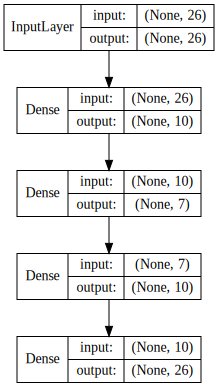

In [9]:
autoencoder_1_model = keras.models.load_model('autoencoder-model/2018-02-22-18-54-22/weights.hdf5')
autoencoder_1_model.summary()
SVG(model_to_dot(autoencoder_1_model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Load autoencoder 2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 26)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 26)                286       
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________


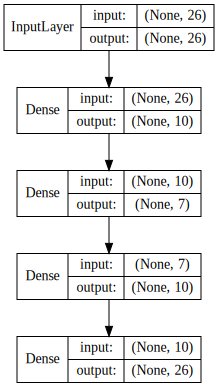

In [10]:
autoencoder_2_model = keras.models.load_model('autoencoder-model/2018-02-22-20-15-20/weights.hdf5')
autoencoder_2_model.summary()
SVG(model_to_dot(autoencoder_2_model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Pass the inputs through the stacked autoencoders

In [11]:
train_x_after_autoencoder_1 = autoencoder_1_model.predict(train_x)
test_x_after_autoencoder_1 = autoencoder_1_model.predict(test_x)

train_x_after_autoencoder_2 = autoencoder_2_model.predict(train_x_after_autoencoder_1)
test_x_after_autoencoder_2 = autoencoder_2_model.predict(test_x_after_autoencoder_1)

pd.DataFrame(train_x_after_autoencoder_2).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.119025,0.133337,0.100288,0.065440,0.099099,0.208838,0.317023,0.154096,0.073068,0.215772,...,0.042582,0.198446,0.205523,0.089205,0.089915,0.387411,0.068396,0.089478,0.013569,0.022209
1,0.069535,0.064309,0.052611,0.035352,0.051105,0.126370,0.198774,0.092228,0.046997,0.132905,...,0.053980,0.260287,0.288551,0.099215,0.099854,0.305631,0.059269,0.089875,0.008974,0.018313
2,0.080155,0.088343,0.081534,0.052260,0.079723,0.185772,0.294014,0.164925,0.076532,0.239179,...,0.045140,0.176695,0.275699,0.815238,0.814380,0.373909,0.059689,0.003078,0.210576,0.039908
3,0.149609,0.126978,0.137036,0.085860,0.136047,0.288217,0.421990,0.220644,0.102172,0.258563,...,0.049406,0.295478,0.254444,0.093334,0.093290,0.264905,0.056354,0.099005,0.010508,0.019321
4,0.229147,0.194438,0.205639,0.118499,0.206258,0.224480,0.335331,0.165993,0.076044,0.232499,...,0.059339,0.281119,0.311308,0.099332,0.095888,0.233687,0.071458,0.213258,0.096368,0.175338


# Prepare model for training

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                864       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


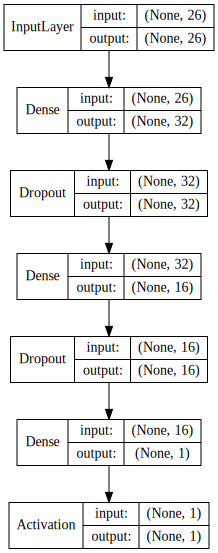

In [13]:
model = Sequential()

model.add(Dense(units = 32, activation='relu', input_dim=train_x_after_autoencoder_2.shape[1]))
model.add(Dropout(0.4))

model.add(Dense(units = 16, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))
model.add(Activation("sigmoid"))

model.summary()
SVG(model_to_dot(model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Prepare callbacks

In [14]:
# Tensorboard
date = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='Tensorboard2/' + date + '/')

# Model weight save
model_path = 'stacked-autoencoder-classify-model/' + date
if not os.path.exists(model_path):
    os.makedirs(model_path)
check_pointer = ModelCheckpoint(filepath=model_path + '/weights.hdf5', verbose=1, save_best_only=True)

callbacks = [check_pointer, tensorboard_callback];

# Train the model

In [15]:
date = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
model.fit(train_x_after_autoencoder_2, train_y, validation_data=(test_x_after_autoencoder_2, test_y), epochs=5000, batch_size=20, callbacks=callbacks)

Train on 1040 samples, validate on 168 samples
Epoch 1/5000
1040/1040 [==============================] - 0s - loss: 0.6911 - acc: 0.5298 - val_loss: 0.7595 - val_acc: 0.1131
Epoch 2/5000
1040/1040 [==============================] - 0s - loss: 0.6864 - acc: 0.5452 - val_loss: 0.6832 - val_acc: 0.5357
Epoch 3/5000
1040/1040 [==============================] - 0s - loss: 0.6895 - acc: 0.5231 - val_loss: 0.7100 - val_acc: 0.3988
Epoch 4/5000
1040/1040 [==============================] - 0s - loss: 0.6911 - acc: 0.5231 - val_loss: 0.6826 - val_acc: 0.5357
Epoch 5/5000
1040/1040 [==============================] - 0s - loss: 0.6820 - acc: 0.5596 - val_loss: 0.6559 - val_acc: 0.8512
Epoch 6/5000
1040/1040 [==============================] - 0s - loss: 0.6770 - acc: 0.5683 - val_loss: 0.5998 - val_acc: 0.9643
Epoch 7/5000
1040/1040 [==============================] - 0s - loss: 0.6792 - acc: 0.5779 - val_loss: 0.5966 - val_acc: 0.9583
Epoch 8/5000
1040/1040 [==============================] - 0s - l

1040/1040 [==============================] - 0s - loss: 0.6472 - acc: 0.6365 - val_loss: 0.4660 - val_acc: 0.9643
Epoch 30/5000
1040/1040 [==============================] - 0s - loss: 0.6361 - acc: 0.6221 - val_loss: 0.4403 - val_acc: 0.9643
Epoch 31/5000
1040/1040 [==============================] - 0s - loss: 0.6526 - acc: 0.6087 - val_loss: 0.4955 - val_acc: 0.9583
Epoch 32/5000
1040/1040 [==============================] - 0s - loss: 0.6482 - acc: 0.6346 - val_loss: 0.4735 - val_acc: 0.9643
Epoch 33/5000
1040/1040 [==============================] - 0s - loss: 0.6428 - acc: 0.6375 - val_loss: 0.4495 - val_acc: 0.9643
Epoch 34/5000
1040/1040 [==============================] - 0s - loss: 0.6456 - acc: 0.6298 - val_loss: 0.4440 - val_acc: 0.9643
Epoch 35/5000
1040/1040 [==============================] - 0s - loss: 0.6398 - acc: 0.6346 - val_loss: 0.4604 - val_acc: 0.9643
Epoch 36/5000
1040/1040 [==============================] - 0s - loss: 0.6425 - acc: 0.6250 - val_loss: 0.4592 - val_ac

1040/1040 [==============================] - 0s - loss: 0.6293 - acc: 0.6413 - val_loss: 0.3720 - val_acc: 0.9464
Epoch 59/5000
1040/1040 [==============================] - 0s - loss: 0.6322 - acc: 0.6510 - val_loss: 0.3823 - val_acc: 0.9226
Epoch 60/5000
1040/1040 [==============================] - 0s - loss: 0.6301 - acc: 0.6365 - val_loss: 0.3500 - val_acc: 0.9583
Epoch 61/5000
1040/1040 [==============================] - 0s - loss: 0.6249 - acc: 0.6510 - val_loss: 0.4144 - val_acc: 0.8393
Epoch 62/5000
1040/1040 [==============================] - 0s - loss: 0.6307 - acc: 0.6490 - val_loss: 0.3864 - val_acc: 0.8929
Epoch 63/5000
1040/1040 [==============================] - 0s - loss: 0.6273 - acc: 0.6462 - val_loss: 0.4608 - val_acc: 0.8393
Epoch 64/5000
1040/1040 [==============================] - 0s - loss: 0.6254 - acc: 0.6375 - val_loss: 0.3735 - val_acc: 0.9167
Epoch 65/5000
1040/1040 [==============================] - 0s - loss: 0.6257 - acc: 0.6471 - val_loss: 0.3515 - val_ac

1040/1040 [==============================] - 0s - loss: 0.6271 - acc: 0.6548 - val_loss: 0.3409 - val_acc: 0.8690
Epoch 91/5000
1040/1040 [==============================] - 0s - loss: 0.6213 - acc: 0.6490 - val_loss: 0.2895 - val_acc: 0.9345
Epoch 92/5000
1040/1040 [==============================] - 0s - loss: 0.6143 - acc: 0.6558 - val_loss: 0.3178 - val_acc: 0.8988
Epoch 93/5000
1040/1040 [==============================] - 0s - loss: 0.6174 - acc: 0.6413 - val_loss: 0.3308 - val_acc: 0.8690
Epoch 94/5000
1040/1040 [==============================] - 0s - loss: 0.6236 - acc: 0.6567 - val_loss: 0.3833 - val_acc: 0.8095
Epoch 95/5000
1040/1040 [==============================] - 0s - loss: 0.6257 - acc: 0.6462 - val_loss: 0.3346 - val_acc: 0.8512
Epoch 96/5000
1040/1040 [==============================] - 0s - loss: 0.6122 - acc: 0.6721 - val_loss: 0.3384 - val_acc: 0.8869
Epoch 97/5000
1040/1040 [==============================] - 0s - loss: 0.6013 - acc: 0.6548 - val_loss: 0.3283 - val_ac

1040/1040 [==============================] - 0s - loss: 0.6002 - acc: 0.6750 - val_loss: 0.2765 - val_acc: 0.8512
Epoch 123/5000
1040/1040 [==============================] - 0s - loss: 0.6048 - acc: 0.6683 - val_loss: 0.3266 - val_acc: 0.8036
Epoch 124/5000
1040/1040 [==============================] - 0s - loss: 0.6172 - acc: 0.6481 - val_loss: 0.2825 - val_acc: 0.8274
Epoch 125/5000
1040/1040 [==============================] - 0s - loss: 0.6079 - acc: 0.6644 - val_loss: 0.2967 - val_acc: 0.8095
Epoch 126/5000
1040/1040 [==============================] - 0s - loss: 0.6087 - acc: 0.6683 - val_loss: 0.3481 - val_acc: 0.8036
Epoch 127/5000
1040/1040 [==============================] - 0s - loss: 0.6068 - acc: 0.6702 - val_loss: 0.3106 - val_acc: 0.8095
Epoch 128/5000
1040/1040 [==============================] - 0s - loss: 0.6182 - acc: 0.6721 - val_loss: 0.3191 - val_acc: 0.8095
Epoch 129/5000
1040/1040 [==============================] - 0s - loss: 0.6062 - acc: 0.6712 - val_loss: 0.3124 -

1040/1040 [==============================] - 0s - loss: 0.6092 - acc: 0.6702 - val_loss: 0.3052 - val_acc: 0.7917
Epoch 156/5000
1040/1040 [==============================] - 0s - loss: 0.5988 - acc: 0.6712 - val_loss: 0.3011 - val_acc: 0.8155
Epoch 157/5000
1040/1040 [==============================] - 0s - loss: 0.5927 - acc: 0.6750 - val_loss: 0.3227 - val_acc: 0.8095
Epoch 158/5000
1040/1040 [==============================] - 0s - loss: 0.6020 - acc: 0.6654 - val_loss: 0.3341 - val_acc: 0.7798
Epoch 159/5000
1040/1040 [==============================] - 0s - loss: 0.6028 - acc: 0.6846 - val_loss: 0.3354 - val_acc: 0.7798
Epoch 160/5000
1040/1040 [==============================] - 0s - loss: 0.6123 - acc: 0.6606 - val_loss: 0.2973 - val_acc: 0.8036
Epoch 161/5000
1040/1040 [==============================] - 0s - loss: 0.6123 - acc: 0.6625 - val_loss: 0.3309 - val_acc: 0.7976
Epoch 162/5000
1040/1040 [==============================] - 0s - loss: 0.5947 - acc: 0.6702 - val_loss: 0.3081 -

1040/1040 [==============================] - 0s - loss: 0.5994 - acc: 0.6692 - val_loss: 0.3567 - val_acc: 0.7679
Epoch 189/5000
1040/1040 [==============================] - 0s - loss: 0.6018 - acc: 0.6558 - val_loss: 0.2633 - val_acc: 0.8333
Epoch 190/5000
1040/1040 [==============================] - 0s - loss: 0.6019 - acc: 0.6510 - val_loss: 0.3451 - val_acc: 0.7798
Epoch 191/5000
1040/1040 [==============================] - 0s - loss: 0.5909 - acc: 0.6644 - val_loss: 0.3121 - val_acc: 0.7917
Epoch 192/5000
1040/1040 [==============================] - 0s - loss: 0.5937 - acc: 0.6663 - val_loss: 0.2745 - val_acc: 0.8095
Epoch 193/5000
1040/1040 [==============================] - 0s - loss: 0.6049 - acc: 0.6548 - val_loss: 0.2284 - val_acc: 0.8333
Epoch 194/5000
1040/1040 [==============================] - 0s - loss: 0.5971 - acc: 0.6692 - val_loss: 0.2756 - val_acc: 0.7976
Epoch 195/5000
1040/1040 [==============================] - 0s - loss: 0.5969 - acc: 0.6663 - val_loss: 0.2742 -

1040/1040 [==============================] - 0s - loss: 0.5922 - acc: 0.6692 - val_loss: 0.2561 - val_acc: 0.8095
Epoch 220/5000
1040/1040 [==============================] - 0s - loss: 0.5869 - acc: 0.6788 - val_loss: 0.3035 - val_acc: 0.7857
Epoch 221/5000
1040/1040 [==============================] - 0s - loss: 0.5982 - acc: 0.6577 - val_loss: 0.3578 - val_acc: 0.7440
Epoch 222/5000
1040/1040 [==============================] - 0s - loss: 0.6058 - acc: 0.6712 - val_loss: 0.2997 - val_acc: 0.7857
Epoch 223/5000
1040/1040 [==============================] - 0s - loss: 0.5831 - acc: 0.6933 - val_loss: 0.2681 - val_acc: 0.8095
Epoch 224/5000
1040/1040 [==============================] - 0s - loss: 0.6008 - acc: 0.6769 - val_loss: 0.2984 - val_acc: 0.7738
Epoch 225/5000
1040/1040 [==============================] - 0s - loss: 0.5784 - acc: 0.6885 - val_loss: 0.2663 - val_acc: 0.8095
Epoch 226/5000
1040/1040 [==============================] - 0s - loss: 0.5974 - acc: 0.6683 - val_loss: 0.2962 -

1040/1040 [==============================] - 0s - loss: 0.5822 - acc: 0.6788 - val_loss: 0.2942 - val_acc: 0.7976
Epoch 253/5000
1040/1040 [==============================] - 0s - loss: 0.5906 - acc: 0.6740 - val_loss: 0.3588 - val_acc: 0.7500
Epoch 254/5000
1040/1040 [==============================] - 0s - loss: 0.5814 - acc: 0.6683 - val_loss: 0.3113 - val_acc: 0.7560
Epoch 255/5000
1040/1040 [==============================] - 0s - loss: 0.5903 - acc: 0.6692 - val_loss: 0.2927 - val_acc: 0.7738
Epoch 256/5000
1040/1040 [==============================] - 0s - loss: 0.5821 - acc: 0.6894 - val_loss: 0.3493 - val_acc: 0.7500
Epoch 257/5000
1040/1040 [==============================] - 0s - loss: 0.5938 - acc: 0.6712 - val_loss: 0.2997 - val_acc: 0.7798
Epoch 258/5000
1040/1040 [==============================] - 0s - loss: 0.5785 - acc: 0.6952 - val_loss: 0.3760 - val_acc: 0.7560
Epoch 259/5000
1040/1040 [==============================] - 0s - loss: 0.5944 - acc: 0.6769 - val_loss: 0.2791 -

1040/1040 [==============================] - 0s - loss: 0.5852 - acc: 0.6808 - val_loss: 0.3114 - val_acc: 0.7798
Epoch 286/5000
1040/1040 [==============================] - 0s - loss: 0.5939 - acc: 0.6644 - val_loss: 0.3180 - val_acc: 0.7679
Epoch 287/5000
1040/1040 [==============================] - 0s - loss: 0.5989 - acc: 0.6846 - val_loss: 0.2779 - val_acc: 0.7857
Epoch 288/5000
1040/1040 [==============================] - 0s - loss: 0.5785 - acc: 0.6827 - val_loss: 0.3248 - val_acc: 0.7738
Epoch 289/5000
1040/1040 [==============================] - 0s - loss: 0.5944 - acc: 0.6788 - val_loss: 0.2739 - val_acc: 0.7857
Epoch 290/5000
1040/1040 [==============================] - 0s - loss: 0.5907 - acc: 0.6692 - val_loss: 0.2881 - val_acc: 0.7679
Epoch 291/5000
1040/1040 [==============================] - 0s - loss: 0.5906 - acc: 0.6885 - val_loss: 0.2563 - val_acc: 0.8155
Epoch 292/5000
1040/1040 [==============================] - 0s - loss: 0.5896 - acc: 0.6827 - val_loss: 0.2521 -

1040/1040 [==============================] - 0s - loss: 0.5797 - acc: 0.6865 - val_loss: 0.2826 - val_acc: 0.7857
Epoch 319/5000
1040/1040 [==============================] - 0s - loss: 0.5977 - acc: 0.6692 - val_loss: 0.3158 - val_acc: 0.7619
Epoch 320/5000
1040/1040 [==============================] - 0s - loss: 0.5810 - acc: 0.6875 - val_loss: 0.2794 - val_acc: 0.7798
Epoch 321/5000
1040/1040 [==============================] - 0s - loss: 0.5913 - acc: 0.6721 - val_loss: 0.2553 - val_acc: 0.8274
Epoch 322/5000
1040/1040 [==============================] - 0s - loss: 0.5875 - acc: 0.6683 - val_loss: 0.3401 - val_acc: 0.7500
Epoch 323/5000
1040/1040 [==============================] - 0s - loss: 0.6060 - acc: 0.6731 - val_loss: 0.3102 - val_acc: 0.7619
Epoch 324/5000
1040/1040 [==============================] - 0s - loss: 0.5830 - acc: 0.6779 - val_loss: 0.3451 - val_acc: 0.7619
Epoch 325/5000
1040/1040 [==============================] - 0s - loss: 0.5938 - acc: 0.6740 - val_loss: 0.3238 -

1040/1040 [==============================] - 0s - loss: 0.5873 - acc: 0.6933 - val_loss: 0.3419 - val_acc: 0.7619
Epoch 352/5000
1040/1040 [==============================] - 0s - loss: 0.5768 - acc: 0.6721 - val_loss: 0.3460 - val_acc: 0.7560
Epoch 353/5000
1040/1040 [==============================] - 0s - loss: 0.5802 - acc: 0.6769 - val_loss: 0.2556 - val_acc: 0.8512
Epoch 354/5000
1040/1040 [==============================] - 0s - loss: 0.5835 - acc: 0.6894 - val_loss: 0.3137 - val_acc: 0.7679
Epoch 355/5000
1040/1040 [==============================] - 0s - loss: 0.5850 - acc: 0.6817 - val_loss: 0.2921 - val_acc: 0.7917
Epoch 356/5000
1040/1040 [==============================] - 0s - loss: 0.5764 - acc: 0.6692 - val_loss: 0.3303 - val_acc: 0.7857
Epoch 357/5000
1040/1040 [==============================] - 0s - loss: 0.5788 - acc: 0.6837 - val_loss: 0.2947 - val_acc: 0.7976
Epoch 358/5000
1040/1040 [==============================] - 0s - loss: 0.5865 - acc: 0.6692 - val_loss: 0.3113 -

1040/1040 [==============================] - 0s - loss: 0.5778 - acc: 0.6894 - val_loss: 0.3151 - val_acc: 0.8036
Epoch 385/5000
1040/1040 [==============================] - 0s - loss: 0.5918 - acc: 0.6875 - val_loss: 0.4415 - val_acc: 0.7381
Epoch 386/5000
1040/1040 [==============================] - 0s - loss: 0.5889 - acc: 0.6808 - val_loss: 0.3876 - val_acc: 0.7440
Epoch 387/5000
1040/1040 [==============================] - 0s - loss: 0.5871 - acc: 0.6740 - val_loss: 0.3568 - val_acc: 0.7619
Epoch 388/5000
1040/1040 [==============================] - 0s - loss: 0.5875 - acc: 0.6644 - val_loss: 0.3509 - val_acc: 0.7679
Epoch 389/5000
1040/1040 [==============================] - 0s - loss: 0.5934 - acc: 0.6721 - val_loss: 0.3200 - val_acc: 0.7679
Epoch 390/5000
1040/1040 [==============================] - 0s - loss: 0.5781 - acc: 0.6923 - val_loss: 0.3174 - val_acc: 0.7679
Epoch 391/5000
1040/1040 [==============================] - 0s - loss: 0.5923 - acc: 0.6692 - val_loss: 0.3185 -

1040/1040 [==============================] - 0s - loss: 0.5803 - acc: 0.6779 - val_loss: 0.2189 - val_acc: 0.8512
Epoch 418/5000
1040/1040 [==============================] - 0s - loss: 0.5957 - acc: 0.6798 - val_loss: 0.2668 - val_acc: 0.8274
Epoch 419/5000
1040/1040 [==============================] - 0s - loss: 0.5796 - acc: 0.6702 - val_loss: 0.3265 - val_acc: 0.7976
Epoch 420/5000
1040/1040 [==============================] - 0s - loss: 0.5801 - acc: 0.6683 - val_loss: 0.2843 - val_acc: 0.8274
Epoch 421/5000
1040/1040 [==============================] - 0s - loss: 0.5915 - acc: 0.6817 - val_loss: 0.2533 - val_acc: 0.8750
Epoch 422/5000
1040/1040 [==============================] - 0s - loss: 0.5814 - acc: 0.6760 - val_loss: 0.2758 - val_acc: 0.8333
Epoch 423/5000
1040/1040 [==============================] - 0s - loss: 0.5845 - acc: 0.6798 - val_loss: 0.3018 - val_acc: 0.8036
Epoch 424/5000
1040/1040 [==============================] - 0s - loss: 0.5901 - acc: 0.6692 - val_loss: 0.2978 -

1040/1040 [==============================] - 0s - loss: 0.5956 - acc: 0.6817 - val_loss: 0.2948 - val_acc: 0.8155
Epoch 451/5000
1040/1040 [==============================] - 0s - loss: 0.5967 - acc: 0.6798 - val_loss: 0.3180 - val_acc: 0.7917
Epoch 452/5000
1040/1040 [==============================] - 0s - loss: 0.5835 - acc: 0.6683 - val_loss: 0.2580 - val_acc: 0.8393
Epoch 453/5000
1040/1040 [==============================] - 0s - loss: 0.5932 - acc: 0.6760 - val_loss: 0.2931 - val_acc: 0.8214
Epoch 454/5000
1040/1040 [==============================] - 0s - loss: 0.5967 - acc: 0.6750 - val_loss: 0.2673 - val_acc: 0.8036
Epoch 455/5000
1040/1040 [==============================] - 0s - loss: 0.5862 - acc: 0.6760 - val_loss: 0.3374 - val_acc: 0.7560
Epoch 456/5000
1040/1040 [==============================] - 0s - loss: 0.5924 - acc: 0.6894 - val_loss: 0.3367 - val_acc: 0.7560
Epoch 457/5000
1040/1040 [==============================] - 0s - loss: 0.5778 - acc: 0.6913 - val_loss: 0.3090 -

1040/1040 [==============================] - 0s - loss: 0.5907 - acc: 0.6827 - val_loss: 0.2971 - val_acc: 0.8155
Epoch 484/5000
1040/1040 [==============================] - 0s - loss: 0.5846 - acc: 0.6865 - val_loss: 0.3745 - val_acc: 0.7798
Epoch 485/5000
1040/1040 [==============================] - 0s - loss: 0.5847 - acc: 0.6779 - val_loss: 0.2347 - val_acc: 0.9048
Epoch 486/5000
1040/1040 [==============================] - 0s - loss: 0.5962 - acc: 0.6683 - val_loss: 0.3071 - val_acc: 0.8333
Epoch 487/5000
1040/1040 [==============================] - 0s - loss: 0.5928 - acc: 0.6712 - val_loss: 0.3149 - val_acc: 0.8036
Epoch 488/5000
1040/1040 [==============================] - 0s - loss: 0.5919 - acc: 0.6779 - val_loss: 0.3198 - val_acc: 0.8214
Epoch 489/5000
1040/1040 [==============================] - 0s - loss: 0.5829 - acc: 0.6779 - val_loss: 0.3130 - val_acc: 0.7917
Epoch 490/5000
1040/1040 [==============================] - 0s - loss: 0.6028 - acc: 0.6837 - val_loss: 0.3540 -

1040/1040 [==============================] - 0s - loss: 0.5973 - acc: 0.6760 - val_loss: 0.3571 - val_acc: 0.7560
Epoch 517/5000
1040/1040 [==============================] - 0s - loss: 0.5870 - acc: 0.6808 - val_loss: 0.3379 - val_acc: 0.7619
Epoch 518/5000
1040/1040 [==============================] - 0s - loss: 0.5755 - acc: 0.7010 - val_loss: 0.2906 - val_acc: 0.8155
Epoch 519/5000
1040/1040 [==============================] - 0s - loss: 0.5837 - acc: 0.6990 - val_loss: 0.2891 - val_acc: 0.8155
Epoch 520/5000
1040/1040 [==============================] - 0s - loss: 0.5952 - acc: 0.6731 - val_loss: 0.3556 - val_acc: 0.7798
Epoch 521/5000
1040/1040 [==============================] - 0s - loss: 0.5867 - acc: 0.6788 - val_loss: 0.2767 - val_acc: 0.8452
Epoch 522/5000
1040/1040 [==============================] - 0s - loss: 0.5887 - acc: 0.6846 - val_loss: 0.3260 - val_acc: 0.7857
Epoch 523/5000
1040/1040 [==============================] - 0s - loss: 0.6021 - acc: 0.6731 - val_loss: 0.3032 -

1040/1040 [==============================] - 0s - loss: 0.5937 - acc: 0.6750 - val_loss: 0.4405 - val_acc: 0.7262
Epoch 550/5000
1040/1040 [==============================] - 0s - loss: 0.5898 - acc: 0.6769 - val_loss: 0.3295 - val_acc: 0.7738
Epoch 551/5000
1040/1040 [==============================] - 0s - loss: 0.5991 - acc: 0.6837 - val_loss: 0.3023 - val_acc: 0.7857
Epoch 552/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6913 - val_loss: 0.2998 - val_acc: 0.8095
Epoch 553/5000
1040/1040 [==============================] - 0s - loss: 0.5762 - acc: 0.6798 - val_loss: 0.3789 - val_acc: 0.7619
Epoch 554/5000
1040/1040 [==============================] - 0s - loss: 0.5796 - acc: 0.6827 - val_loss: 0.3156 - val_acc: 0.7857
Epoch 555/5000
1040/1040 [==============================] - 0s - loss: 0.5910 - acc: 0.6865 - val_loss: 0.3363 - val_acc: 0.7560
Epoch 556/5000
1040/1040 [==============================] - 0s - loss: 0.5834 - acc: 0.6894 - val_loss: 0.3444 -

1040/1040 [==============================] - 0s - loss: 0.5722 - acc: 0.6731 - val_loss: 0.2972 - val_acc: 0.8571
Epoch 583/5000
1040/1040 [==============================] - 0s - loss: 0.5741 - acc: 0.6846 - val_loss: 0.3599 - val_acc: 0.7976
Epoch 584/5000
1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6865 - val_loss: 0.3066 - val_acc: 0.8036
Epoch 585/5000
1040/1040 [==============================] - 0s - loss: 0.5808 - acc: 0.6846 - val_loss: 0.3200 - val_acc: 0.7976
Epoch 586/5000
1040/1040 [==============================] - 0s - loss: 0.5898 - acc: 0.6760 - val_loss: 0.3556 - val_acc: 0.7798
Epoch 587/5000
1040/1040 [==============================] - 0s - loss: 0.5984 - acc: 0.6769 - val_loss: 0.3243 - val_acc: 0.8155
Epoch 588/5000
1040/1040 [==============================] - 0s - loss: 0.5819 - acc: 0.6731 - val_loss: 0.3982 - val_acc: 0.7679
Epoch 589/5000
1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.6865 - val_loss: 0.2937 -

1040/1040 [==============================] - 0s - loss: 0.5930 - acc: 0.6731 - val_loss: 0.2893 - val_acc: 0.8333
Epoch 616/5000
1040/1040 [==============================] - 0s - loss: 0.5753 - acc: 0.6817 - val_loss: 0.3554 - val_acc: 0.7917
Epoch 617/5000
1040/1040 [==============================] - 0s - loss: 0.5739 - acc: 0.6817 - val_loss: 0.3257 - val_acc: 0.8214
Epoch 618/5000
1040/1040 [==============================] - 0s - loss: 0.5831 - acc: 0.6788 - val_loss: 0.3199 - val_acc: 0.8036
Epoch 619/5000
1040/1040 [==============================] - 0s - loss: 0.5795 - acc: 0.6894 - val_loss: 0.2792 - val_acc: 0.8512
Epoch 620/5000
1040/1040 [==============================] - 0s - loss: 0.5784 - acc: 0.6846 - val_loss: 0.3337 - val_acc: 0.7738
Epoch 621/5000
1040/1040 [==============================] - 0s - loss: 0.5927 - acc: 0.6808 - val_loss: 0.3080 - val_acc: 0.7798
Epoch 622/5000
1040/1040 [==============================] - 0s - loss: 0.5723 - acc: 0.6942 - val_loss: 0.3435 -

1040/1040 [==============================] - 0s - loss: 0.5838 - acc: 0.6712 - val_loss: 0.3861 - val_acc: 0.7619
Epoch 649/5000
1040/1040 [==============================] - 0s - loss: 0.5840 - acc: 0.6808 - val_loss: 0.3607 - val_acc: 0.7798
Epoch 650/5000
1040/1040 [==============================] - 0s - loss: 0.5881 - acc: 0.6769 - val_loss: 0.3670 - val_acc: 0.7679
Epoch 651/5000
1040/1040 [==============================] - 0s - loss: 0.5719 - acc: 0.6856 - val_loss: 0.3369 - val_acc: 0.8214
Epoch 652/5000
1040/1040 [==============================] - 0s - loss: 0.5899 - acc: 0.6769 - val_loss: 0.3049 - val_acc: 0.8095
Epoch 653/5000
1040/1040 [==============================] - 0s - loss: 0.5755 - acc: 0.6885 - val_loss: 0.3213 - val_acc: 0.8274
Epoch 654/5000
1040/1040 [==============================] - 0s - loss: 0.6016 - acc: 0.6731 - val_loss: 0.3284 - val_acc: 0.8036
Epoch 655/5000
1040/1040 [==============================] - 0s - loss: 0.5867 - acc: 0.6731 - val_loss: 0.3884 -

1040/1040 [==============================] - 0s - loss: 0.5737 - acc: 0.6885 - val_loss: 0.3959 - val_acc: 0.7440
Epoch 682/5000
1040/1040 [==============================] - 0s - loss: 0.5902 - acc: 0.6788 - val_loss: 0.3807 - val_acc: 0.7560
Epoch 683/5000
1040/1040 [==============================] - 0s - loss: 0.5891 - acc: 0.6673 - val_loss: 0.3235 - val_acc: 0.8155
Epoch 684/5000
1040/1040 [==============================] - 0s - loss: 0.5691 - acc: 0.7000 - val_loss: 0.3338 - val_acc: 0.7917
Epoch 685/5000
1040/1040 [==============================] - 0s - loss: 0.5772 - acc: 0.6942 - val_loss: 0.3566 - val_acc: 0.7738
Epoch 686/5000
1040/1040 [==============================] - 0s - loss: 0.5879 - acc: 0.6712 - val_loss: 0.3530 - val_acc: 0.7798
Epoch 687/5000
1040/1040 [==============================] - 0s - loss: 0.5722 - acc: 0.6740 - val_loss: 0.3741 - val_acc: 0.7917
Epoch 688/5000
1040/1040 [==============================] - 0s - loss: 0.5708 - acc: 0.6846 - val_loss: 0.3203 -

1040/1040 [==============================] - 0s - loss: 0.5719 - acc: 0.6865 - val_loss: 0.4017 - val_acc: 0.7679
Epoch 715/5000
1040/1040 [==============================] - 0s - loss: 0.5586 - acc: 0.6923 - val_loss: 0.3553 - val_acc: 0.7738
Epoch 716/5000
1040/1040 [==============================] - 0s - loss: 0.5809 - acc: 0.6865 - val_loss: 0.4091 - val_acc: 0.7679
Epoch 717/5000
1040/1040 [==============================] - 0s - loss: 0.5953 - acc: 0.6846 - val_loss: 0.3296 - val_acc: 0.7738
Epoch 718/5000
1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6856 - val_loss: 0.3217 - val_acc: 0.7917
Epoch 719/5000
1040/1040 [==============================] - 0s - loss: 0.5876 - acc: 0.6692 - val_loss: 0.3631 - val_acc: 0.7917
Epoch 720/5000
1040/1040 [==============================] - 0s - loss: 0.5872 - acc: 0.6779 - val_loss: 0.3584 - val_acc: 0.7738
Epoch 721/5000
1040/1040 [==============================] - 0s - loss: 0.5940 - acc: 0.6971 - val_loss: 0.3521 -

1040/1040 [==============================] - 0s - loss: 0.5809 - acc: 0.6760 - val_loss: 0.3602 - val_acc: 0.7679
Epoch 748/5000
1040/1040 [==============================] - 0s - loss: 0.5788 - acc: 0.6837 - val_loss: 0.3782 - val_acc: 0.7619
Epoch 749/5000
1040/1040 [==============================] - 0s - loss: 0.5916 - acc: 0.6837 - val_loss: 0.2871 - val_acc: 0.7917
Epoch 750/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.6740 - val_loss: 0.3223 - val_acc: 0.7798
Epoch 751/5000
1040/1040 [==============================] - 0s - loss: 0.5763 - acc: 0.6865 - val_loss: 0.3304 - val_acc: 0.7679
Epoch 752/5000
1040/1040 [==============================] - 0s - loss: 0.5689 - acc: 0.6827 - val_loss: 0.3380 - val_acc: 0.7679
Epoch 753/5000
1040/1040 [==============================] - 0s - loss: 0.5765 - acc: 0.6990 - val_loss: 0.3459 - val_acc: 0.7798
Epoch 754/5000
1040/1040 [==============================] - 0s - loss: 0.5682 - acc: 0.6721 - val_loss: 0.3718 -

1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6894 - val_loss: 0.3115 - val_acc: 0.7738
Epoch 781/5000
1040/1040 [==============================] - 0s - loss: 0.5855 - acc: 0.6750 - val_loss: 0.3318 - val_acc: 0.7738
Epoch 782/5000
1040/1040 [==============================] - 0s - loss: 0.5790 - acc: 0.6942 - val_loss: 0.2773 - val_acc: 0.8095
Epoch 783/5000
1040/1040 [==============================] - 0s - loss: 0.5818 - acc: 0.6788 - val_loss: 0.3462 - val_acc: 0.7738
Epoch 784/5000
1040/1040 [==============================] - 0s - loss: 0.5733 - acc: 0.6962 - val_loss: 0.3194 - val_acc: 0.7560
Epoch 785/5000
1040/1040 [==============================] - 0s - loss: 0.5725 - acc: 0.6779 - val_loss: 0.3655 - val_acc: 0.7619
Epoch 786/5000
1040/1040 [==============================] - 0s - loss: 0.5864 - acc: 0.6760 - val_loss: 0.2938 - val_acc: 0.7798
Epoch 787/5000
1040/1040 [==============================] - 0s - loss: 0.5703 - acc: 0.6923 - val_loss: 0.2765 -

1040/1040 [==============================] - 0s - loss: 0.5869 - acc: 0.6904 - val_loss: 0.3885 - val_acc: 0.7500
Epoch 814/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6942 - val_loss: 0.3418 - val_acc: 0.7679
Epoch 815/5000
1040/1040 [==============================] - 0s - loss: 0.5798 - acc: 0.6817 - val_loss: 0.2954 - val_acc: 0.7798
Epoch 816/5000
1040/1040 [==============================] - 0s - loss: 0.5909 - acc: 0.6981 - val_loss: 0.3394 - val_acc: 0.7619
Epoch 817/5000
1040/1040 [==============================] - 0s - loss: 0.5835 - acc: 0.6913 - val_loss: 0.3468 - val_acc: 0.7619
Epoch 818/5000
1040/1040 [==============================] - 0s - loss: 0.5672 - acc: 0.6913 - val_loss: 0.3368 - val_acc: 0.7619
Epoch 819/5000
1040/1040 [==============================] - 0s - loss: 0.5715 - acc: 0.6788 - val_loss: 0.3161 - val_acc: 0.7798
Epoch 820/5000
1040/1040 [==============================] - 0s - loss: 0.5942 - acc: 0.6788 - val_loss: 0.3425 -

1040/1040 [==============================] - 0s - loss: 0.5741 - acc: 0.6846 - val_loss: 0.3352 - val_acc: 0.7917
Epoch 847/5000
1040/1040 [==============================] - 0s - loss: 0.5818 - acc: 0.6721 - val_loss: 0.3584 - val_acc: 0.7560
Epoch 848/5000
1040/1040 [==============================] - 0s - loss: 0.5745 - acc: 0.6856 - val_loss: 0.3639 - val_acc: 0.7619
Epoch 849/5000
1040/1040 [==============================] - 0s - loss: 0.5824 - acc: 0.6885 - val_loss: 0.3404 - val_acc: 0.7738
Epoch 850/5000
1040/1040 [==============================] - 0s - loss: 0.5758 - acc: 0.6827 - val_loss: 0.3809 - val_acc: 0.7738
Epoch 851/5000
1040/1040 [==============================] - 0s - loss: 0.5878 - acc: 0.6846 - val_loss: 0.3323 - val_acc: 0.7857
Epoch 852/5000
1040/1040 [==============================] - 0s - loss: 0.5695 - acc: 0.6971 - val_loss: 0.3585 - val_acc: 0.7679
Epoch 853/5000
1040/1040 [==============================] - 0s - loss: 0.5760 - acc: 0.6962 - val_loss: 0.3678 -

1040/1040 [==============================] - 0s - loss: 0.5952 - acc: 0.6885 - val_loss: 0.3390 - val_acc: 0.7738
Epoch 880/5000
1040/1040 [==============================] - 0s - loss: 0.5852 - acc: 0.6721 - val_loss: 0.3956 - val_acc: 0.7679
Epoch 881/5000
1040/1040 [==============================] - 0s - loss: 0.5927 - acc: 0.6846 - val_loss: 0.4113 - val_acc: 0.7440
Epoch 882/5000
1040/1040 [==============================] - 0s - loss: 0.5733 - acc: 0.6798 - val_loss: 0.4124 - val_acc: 0.7560
Epoch 883/5000
1040/1040 [==============================] - 0s - loss: 0.5787 - acc: 0.6923 - val_loss: 0.3474 - val_acc: 0.8155
Epoch 884/5000
1040/1040 [==============================] - 0s - loss: 0.5781 - acc: 0.6817 - val_loss: 0.4039 - val_acc: 0.7500
Epoch 885/5000
1040/1040 [==============================] - 0s - loss: 0.5833 - acc: 0.6856 - val_loss: 0.3012 - val_acc: 0.8036
Epoch 886/5000
1040/1040 [==============================] - 0s - loss: 0.5845 - acc: 0.6712 - val_loss: 0.2843 -

1040/1040 [==============================] - 0s - loss: 0.5868 - acc: 0.6740 - val_loss: 0.3425 - val_acc: 0.7679
Epoch 913/5000
1040/1040 [==============================] - 0s - loss: 0.5787 - acc: 0.6779 - val_loss: 0.3533 - val_acc: 0.7738
Epoch 914/5000
1040/1040 [==============================] - 0s - loss: 0.5672 - acc: 0.6817 - val_loss: 0.3978 - val_acc: 0.7560
Epoch 915/5000
1040/1040 [==============================] - 0s - loss: 0.5657 - acc: 0.6856 - val_loss: 0.3170 - val_acc: 0.7917
Epoch 916/5000
1040/1040 [==============================] - 0s - loss: 0.5765 - acc: 0.6942 - val_loss: 0.3407 - val_acc: 0.7798
Epoch 917/5000
1040/1040 [==============================] - 0s - loss: 0.5755 - acc: 0.6769 - val_loss: 0.3494 - val_acc: 0.7798
Epoch 918/5000
1040/1040 [==============================] - 0s - loss: 0.5815 - acc: 0.6865 - val_loss: 0.3214 - val_acc: 0.7976
Epoch 919/5000
1040/1040 [==============================] - 0s - loss: 0.5795 - acc: 0.6788 - val_loss: 0.3219 -

1040/1040 [==============================] - 0s - loss: 0.5828 - acc: 0.6779 - val_loss: 0.2541 - val_acc: 0.8155
Epoch 946/5000
1040/1040 [==============================] - 0s - loss: 0.5866 - acc: 0.6721 - val_loss: 0.3478 - val_acc: 0.7679
Epoch 947/5000
1040/1040 [==============================] - 0s - loss: 0.5772 - acc: 0.6894 - val_loss: 0.3933 - val_acc: 0.7500
Epoch 948/5000
1040/1040 [==============================] - 0s - loss: 0.5692 - acc: 0.6817 - val_loss: 0.3403 - val_acc: 0.7679
Epoch 949/5000
1040/1040 [==============================] - 0s - loss: 0.5849 - acc: 0.6817 - val_loss: 0.3480 - val_acc: 0.7560
Epoch 950/5000
1040/1040 [==============================] - 0s - loss: 0.5658 - acc: 0.7000 - val_loss: 0.3599 - val_acc: 0.7679
Epoch 951/5000
1040/1040 [==============================] - 0s - loss: 0.5681 - acc: 0.6837 - val_loss: 0.3449 - val_acc: 0.7679
Epoch 952/5000
1040/1040 [==============================] - 0s - loss: 0.5656 - acc: 0.6827 - val_loss: 0.3300 -

1040/1040 [==============================] - 0s - loss: 0.5809 - acc: 0.6769 - val_loss: 0.3219 - val_acc: 0.7679
Epoch 979/5000
1040/1040 [==============================] - 0s - loss: 0.5760 - acc: 0.6865 - val_loss: 0.2595 - val_acc: 0.8155
Epoch 980/5000
1040/1040 [==============================] - 0s - loss: 0.5761 - acc: 0.6904 - val_loss: 0.3155 - val_acc: 0.7679
Epoch 981/5000
1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.6865 - val_loss: 0.2514 - val_acc: 0.8214
Epoch 982/5000
1040/1040 [==============================] - 0s - loss: 0.5808 - acc: 0.6865 - val_loss: 0.2056 - val_acc: 0.8452
Epoch 983/5000
1040/1040 [==============================] - 0s - loss: 0.5770 - acc: 0.6865 - val_loss: 0.3019 - val_acc: 0.7857
Epoch 984/5000
1040/1040 [==============================] - 0s - loss: 0.5840 - acc: 0.6904 - val_loss: 0.2560 - val_acc: 0.8214
Epoch 985/5000
1040/1040 [==============================] - 0s - loss: 0.5794 - acc: 0.6904 - val_loss: 0.2554 -

1040/1040 [==============================] - 0s - loss: 0.5845 - acc: 0.6827 - val_loss: 0.3112 - val_acc: 0.7738
Epoch 1012/5000
1040/1040 [==============================] - 0s - loss: 0.5755 - acc: 0.6885 - val_loss: 0.3913 - val_acc: 0.7738
Epoch 1013/5000
1040/1040 [==============================] - 0s - loss: 0.5848 - acc: 0.6577 - val_loss: 0.3638 - val_acc: 0.7738
Epoch 1014/5000
1040/1040 [==============================] - 0s - loss: 0.5805 - acc: 0.6740 - val_loss: 0.3716 - val_acc: 0.7619
Epoch 1015/5000
1040/1040 [==============================] - 0s - loss: 0.5554 - acc: 0.6942 - val_loss: 0.3529 - val_acc: 0.7679
Epoch 1016/5000
1040/1040 [==============================] - 0s - loss: 0.5737 - acc: 0.6808 - val_loss: 0.2905 - val_acc: 0.7917
Epoch 1017/5000
1040/1040 [==============================] - 0s - loss: 0.5778 - acc: 0.6779 - val_loss: 0.2676 - val_acc: 0.7976
Epoch 1018/5000
1040/1040 [==============================] - 0s - loss: 0.5905 - acc: 0.6788 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5705 - acc: 0.6865 - val_loss: 0.2797 - val_acc: 0.8036
Epoch 1044/5000
1040/1040 [==============================] - 0s - loss: 0.5756 - acc: 0.6798 - val_loss: 0.2377 - val_acc: 0.8155
Epoch 1045/5000
1040/1040 [==============================] - 0s - loss: 0.5653 - acc: 0.6952 - val_loss: 0.2509 - val_acc: 0.8155
Epoch 1046/5000
1040/1040 [==============================] - 0s - loss: 0.5693 - acc: 0.6942 - val_loss: 0.2805 - val_acc: 0.7917
Epoch 1047/5000
1040/1040 [==============================] - 0s - loss: 0.5765 - acc: 0.6990 - val_loss: 0.3461 - val_acc: 0.7679
Epoch 1048/5000
1040/1040 [==============================] - 0s - loss: 0.5684 - acc: 0.6894 - val_loss: 0.3197 - val_acc: 0.7738
Epoch 1049/5000
1040/1040 [==============================] - 0s - loss: 0.5694 - acc: 0.6962 - val_loss: 0.3612 - val_acc: 0.7619
Epoch 1050/5000
1040/1040 [==============================] - 0s - loss: 0.5713 - acc: 0.6808 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5712 - acc: 0.6856 - val_loss: 0.3297 - val_acc: 0.7679
Epoch 1077/5000
1040/1040 [==============================] - 0s - loss: 0.5744 - acc: 0.6933 - val_loss: 0.2540 - val_acc: 0.8214
Epoch 1078/5000
1040/1040 [==============================] - 0s - loss: 0.5845 - acc: 0.6827 - val_loss: 0.3181 - val_acc: 0.7738
Epoch 1079/5000
1040/1040 [==============================] - 0s - loss: 0.5859 - acc: 0.6894 - val_loss: 0.3448 - val_acc: 0.7679
Epoch 1080/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6846 - val_loss: 0.3192 - val_acc: 0.7738
Epoch 1081/5000
1040/1040 [==============================] - 0s - loss: 0.5782 - acc: 0.6827 - val_loss: 0.2857 - val_acc: 0.7798
Epoch 1082/5000
1040/1040 [==============================] - 0s - loss: 0.5856 - acc: 0.6731 - val_loss: 0.3051 - val_acc: 0.7738
Epoch 1083/5000
1040/1040 [==============================] - 0s - loss: 0.5768 - acc: 0.6904 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5607 - acc: 0.6904 - val_loss: 0.2813 - val_acc: 0.8036
Epoch 1110/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6779 - val_loss: 0.3145 - val_acc: 0.7679
Epoch 1111/5000
1040/1040 [==============================] - 0s - loss: 0.5782 - acc: 0.6933 - val_loss: 0.2990 - val_acc: 0.7857
Epoch 1112/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.6933 - val_loss: 0.2970 - val_acc: 0.8036
Epoch 1113/5000
1040/1040 [==============================] - 0s - loss: 0.5725 - acc: 0.6894 - val_loss: 0.3063 - val_acc: 0.7976
Epoch 1114/5000
1040/1040 [==============================] - 0s - loss: 0.5626 - acc: 0.6952 - val_loss: 0.3057 - val_acc: 0.7976
Epoch 1115/5000
1040/1040 [==============================] - 0s - loss: 0.5714 - acc: 0.6817 - val_loss: 0.3515 - val_acc: 0.7738
Epoch 1116/5000
1040/1040 [==============================] - 0s - loss: 0.5713 - acc: 0.6904 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5721 - acc: 0.6846 - val_loss: 0.3582 - val_acc: 0.7738
Epoch 1143/5000
1040/1040 [==============================] - 0s - loss: 0.5779 - acc: 0.6721 - val_loss: 0.3767 - val_acc: 0.7619
Epoch 1144/5000
1040/1040 [==============================] - 0s - loss: 0.5839 - acc: 0.6865 - val_loss: 0.2757 - val_acc: 0.8036
Epoch 1145/5000
1040/1040 [==============================] - 0s - loss: 0.5630 - acc: 0.6808 - val_loss: 0.3875 - val_acc: 0.7619
Epoch 1146/5000
1040/1040 [==============================] - 0s - loss: 0.5714 - acc: 0.6933 - val_loss: 0.3548 - val_acc: 0.7679
Epoch 1147/5000
1040/1040 [==============================] - 0s - loss: 0.5687 - acc: 0.6933 - val_loss: 0.3379 - val_acc: 0.7798
Epoch 1148/5000
1040/1040 [==============================] - 0s - loss: 0.5734 - acc: 0.6865 - val_loss: 0.3669 - val_acc: 0.7500
Epoch 1149/5000
1040/1040 [==============================] - 0s - loss: 0.5749 - acc: 0.6779 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5814 - acc: 0.6971 - val_loss: 0.3827 - val_acc: 0.7679
Epoch 1176/5000
1040/1040 [==============================] - 0s - loss: 0.5702 - acc: 0.6913 - val_loss: 0.3905 - val_acc: 0.7619
Epoch 1177/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.6817 - val_loss: 0.3338 - val_acc: 0.7798
Epoch 1178/5000
1040/1040 [==============================] - 0s - loss: 0.5668 - acc: 0.6894 - val_loss: 0.3003 - val_acc: 0.7976
Epoch 1179/5000
1040/1040 [==============================] - 0s - loss: 0.5908 - acc: 0.6760 - val_loss: 0.2827 - val_acc: 0.7976
Epoch 1180/5000
1040/1040 [==============================] - 0s - loss: 0.5796 - acc: 0.6798 - val_loss: 0.2807 - val_acc: 0.8036
Epoch 1181/5000
1040/1040 [==============================] - 0s - loss: 0.5767 - acc: 0.6952 - val_loss: 0.4209 - val_acc: 0.7381
Epoch 1182/5000
1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6798 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.6952 - val_loss: 0.3396 - val_acc: 0.7679
Epoch 1209/5000
1040/1040 [==============================] - 0s - loss: 0.5695 - acc: 0.6933 - val_loss: 0.3224 - val_acc: 0.7798
Epoch 1210/5000
1040/1040 [==============================] - 0s - loss: 0.5759 - acc: 0.6885 - val_loss: 0.3151 - val_acc: 0.7738
Epoch 1211/5000
1040/1040 [==============================] - 0s - loss: 0.5535 - acc: 0.7029 - val_loss: 0.2866 - val_acc: 0.7976
Epoch 1212/5000
1040/1040 [==============================] - 0s - loss: 0.5693 - acc: 0.6683 - val_loss: 0.3193 - val_acc: 0.7619
Epoch 1213/5000
1040/1040 [==============================] - 0s - loss: 0.5811 - acc: 0.6923 - val_loss: 0.2782 - val_acc: 0.7917
Epoch 1214/5000
1040/1040 [==============================] - 0s - loss: 0.5856 - acc: 0.6856 - val_loss: 0.3399 - val_acc: 0.7738
Epoch 1215/5000
1040/1040 [==============================] - 0s - loss: 0.5589 - acc: 0.7029 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5847 - acc: 0.6740 - val_loss: 0.3331 - val_acc: 0.7798
Epoch 1242/5000
1040/1040 [==============================] - 0s - loss: 0.5793 - acc: 0.6808 - val_loss: 0.3143 - val_acc: 0.7738
Epoch 1243/5000
1040/1040 [==============================] - 0s - loss: 0.5704 - acc: 0.6894 - val_loss: 0.3461 - val_acc: 0.7679
Epoch 1244/5000
1040/1040 [==============================] - 0s - loss: 0.5727 - acc: 0.6913 - val_loss: 0.3005 - val_acc: 0.7976
Epoch 1245/5000
1040/1040 [==============================] - 0s - loss: 0.5674 - acc: 0.6952 - val_loss: 0.3403 - val_acc: 0.7738
Epoch 1246/5000
1040/1040 [==============================] - 0s - loss: 0.5622 - acc: 0.6875 - val_loss: 0.3197 - val_acc: 0.7976
Epoch 1247/5000
1040/1040 [==============================] - 0s - loss: 0.5852 - acc: 0.6760 - val_loss: 0.3107 - val_acc: 0.7738
Epoch 1248/5000
1040/1040 [==============================] - 0s - loss: 0.5661 - acc: 0.6933 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5694 - acc: 0.6827 - val_loss: 0.3200 - val_acc: 0.7917
Epoch 1275/5000
1040/1040 [==============================] - 0s - loss: 0.5659 - acc: 0.6981 - val_loss: 0.3169 - val_acc: 0.7798
Epoch 1276/5000
1040/1040 [==============================] - 0s - loss: 0.5742 - acc: 0.6923 - val_loss: 0.2820 - val_acc: 0.7917
Epoch 1277/5000
1040/1040 [==============================] - 0s - loss: 0.5776 - acc: 0.6702 - val_loss: 0.3434 - val_acc: 0.7679
Epoch 1278/5000
1040/1040 [==============================] - 0s - loss: 0.5804 - acc: 0.6865 - val_loss: 0.3305 - val_acc: 0.7679
Epoch 1279/5000
1040/1040 [==============================] - 0s - loss: 0.5820 - acc: 0.6952 - val_loss: 0.3418 - val_acc: 0.7738
Epoch 1280/5000
1040/1040 [==============================] - 0s - loss: 0.5805 - acc: 0.6760 - val_loss: 0.3174 - val_acc: 0.7917
Epoch 1281/5000
1040/1040 [==============================] - 0s - loss: 0.5810 - acc: 0.6538 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5668 - acc: 0.6817 - val_loss: 0.2980 - val_acc: 0.8155
Epoch 1308/5000
1040/1040 [==============================] - 0s - loss: 0.5661 - acc: 0.6808 - val_loss: 0.3082 - val_acc: 0.8214
Epoch 1309/5000
1040/1040 [==============================] - 0s - loss: 0.5782 - acc: 0.6788 - val_loss: 0.3016 - val_acc: 0.7798
Epoch 1310/5000
1040/1040 [==============================] - 0s - loss: 0.5661 - acc: 0.6875 - val_loss: 0.3308 - val_acc: 0.7679
Epoch 1311/5000
1040/1040 [==============================] - 0s - loss: 0.5829 - acc: 0.6885 - val_loss: 0.3288 - val_acc: 0.7738
Epoch 1312/5000
1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.6798 - val_loss: 0.3437 - val_acc: 0.7857
Epoch 1313/5000
1040/1040 [==============================] - 0s - loss: 0.5767 - acc: 0.6962 - val_loss: 0.3879 - val_acc: 0.7619
Epoch 1314/5000
1040/1040 [==============================] - 0s - loss: 0.5851 - acc: 0.6942 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6962 - val_loss: 0.3018 - val_acc: 0.7798
Epoch 1341/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6952 - val_loss: 0.2884 - val_acc: 0.7917
Epoch 1342/5000
1040/1040 [==============================] - 0s - loss: 0.5578 - acc: 0.6962 - val_loss: 0.3173 - val_acc: 0.7857
Epoch 1343/5000
1040/1040 [==============================] - 0s - loss: 0.5630 - acc: 0.6856 - val_loss: 0.2749 - val_acc: 0.8095
Epoch 1344/5000
1040/1040 [==============================] - 0s - loss: 0.5789 - acc: 0.6933 - val_loss: 0.3520 - val_acc: 0.7798
Epoch 1345/5000
1040/1040 [==============================] - 0s - loss: 0.5806 - acc: 0.6913 - val_loss: 0.3062 - val_acc: 0.8036
Epoch 1346/5000
1040/1040 [==============================] - 0s - loss: 0.5691 - acc: 0.6904 - val_loss: 0.2849 - val_acc: 0.8036
Epoch 1347/5000
1040/1040 [==============================] - 0s - loss: 0.5735 - acc: 0.6894 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5720 - acc: 0.6856 - val_loss: 0.2743 - val_acc: 0.8036
Epoch 1374/5000
1040/1040 [==============================] - 0s - loss: 0.5734 - acc: 0.6942 - val_loss: 0.2715 - val_acc: 0.7798
Epoch 1375/5000
1040/1040 [==============================] - 0s - loss: 0.5673 - acc: 0.7077 - val_loss: 0.3278 - val_acc: 0.7738
Epoch 1376/5000
1040/1040 [==============================] - 0s - loss: 0.5852 - acc: 0.6846 - val_loss: 0.2860 - val_acc: 0.8036
Epoch 1377/5000
1040/1040 [==============================] - 0s - loss: 0.5712 - acc: 0.6846 - val_loss: 0.3064 - val_acc: 0.7798
Epoch 1378/5000
1040/1040 [==============================] - 0s - loss: 0.5623 - acc: 0.7019 - val_loss: 0.3308 - val_acc: 0.7738
Epoch 1379/5000
1040/1040 [==============================] - 0s - loss: 0.5638 - acc: 0.6913 - val_loss: 0.3404 - val_acc: 0.7738
Epoch 1380/5000
1040/1040 [==============================] - 0s - loss: 0.5874 - acc: 0.6712 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5625 - acc: 0.7000 - val_loss: 0.2864 - val_acc: 0.8036
Epoch 1407/5000
1040/1040 [==============================] - 0s - loss: 0.5806 - acc: 0.6837 - val_loss: 0.2694 - val_acc: 0.8036
Epoch 1408/5000
1040/1040 [==============================] - 0s - loss: 0.5495 - acc: 0.6962 - val_loss: 0.2504 - val_acc: 0.8036
Epoch 1409/5000
1040/1040 [==============================] - 0s - loss: 0.5784 - acc: 0.6856 - val_loss: 0.3057 - val_acc: 0.7798
Epoch 1410/5000
1040/1040 [==============================] - 0s - loss: 0.5559 - acc: 0.6913 - val_loss: 0.2880 - val_acc: 0.7857
Epoch 1411/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.6779 - val_loss: 0.3253 - val_acc: 0.7738
Epoch 1412/5000
1040/1040 [==============================] - 0s - loss: 0.5813 - acc: 0.6817 - val_loss: 0.2442 - val_acc: 0.8155
Epoch 1413/5000
1040/1040 [==============================] - 0s - loss: 0.5597 - acc: 0.6894 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5805 - acc: 0.6846 - val_loss: 0.2969 - val_acc: 0.7917
Epoch 1440/5000
1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6808 - val_loss: 0.2819 - val_acc: 0.7857
Epoch 1441/5000
1040/1040 [==============================] - 0s - loss: 0.5593 - acc: 0.6827 - val_loss: 0.3348 - val_acc: 0.7798
Epoch 1442/5000
1040/1040 [==============================] - 0s - loss: 0.5663 - acc: 0.6769 - val_loss: 0.4103 - val_acc: 0.7381
Epoch 1443/5000
1040/1040 [==============================] - 0s - loss: 0.5605 - acc: 0.7038 - val_loss: 0.3685 - val_acc: 0.7619
Epoch 1444/5000
1040/1040 [==============================] - 0s - loss: 0.5745 - acc: 0.6788 - val_loss: 0.2928 - val_acc: 0.7798
Epoch 1445/5000
1040/1040 [==============================] - 0s - loss: 0.5753 - acc: 0.6962 - val_loss: 0.3317 - val_acc: 0.7738
Epoch 1446/5000
1040/1040 [==============================] - 0s - loss: 0.5711 - acc: 0.6856 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5693 - acc: 0.6885 - val_loss: 0.2617 - val_acc: 0.8214
Epoch 1473/5000
1040/1040 [==============================] - 0s - loss: 0.5786 - acc: 0.6894 - val_loss: 0.2947 - val_acc: 0.7917
Epoch 1474/5000
1040/1040 [==============================] - 0s - loss: 0.5679 - acc: 0.6885 - val_loss: 0.3171 - val_acc: 0.7798
Epoch 1475/5000
1040/1040 [==============================] - 0s - loss: 0.5857 - acc: 0.6846 - val_loss: 0.3053 - val_acc: 0.7798
Epoch 1476/5000
1040/1040 [==============================] - 0s - loss: 0.5733 - acc: 0.6846 - val_loss: 0.2669 - val_acc: 0.8095
Epoch 1477/5000
1040/1040 [==============================] - 0s - loss: 0.5825 - acc: 0.7000 - val_loss: 0.2579 - val_acc: 0.8155
Epoch 1478/5000
1040/1040 [==============================] - 0s - loss: 0.5669 - acc: 0.6904 - val_loss: 0.3044 - val_acc: 0.7857
Epoch 1479/5000
1040/1040 [==============================] - 0s - loss: 0.5631 - acc: 0.6865 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5775 - acc: 0.6721 - val_loss: 0.2729 - val_acc: 0.7976
Epoch 1506/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6952 - val_loss: 0.2749 - val_acc: 0.7798
Epoch 1507/5000
1040/1040 [==============================] - 0s - loss: 0.5726 - acc: 0.6846 - val_loss: 0.3146 - val_acc: 0.7798
Epoch 1508/5000
1040/1040 [==============================] - 0s - loss: 0.5660 - acc: 0.6933 - val_loss: 0.2943 - val_acc: 0.8036
Epoch 1509/5000
1040/1040 [==============================] - 0s - loss: 0.5681 - acc: 0.6740 - val_loss: 0.2857 - val_acc: 0.7857
Epoch 1510/5000
1040/1040 [==============================] - 0s - loss: 0.5676 - acc: 0.6933 - val_loss: 0.2695 - val_acc: 0.8036
Epoch 1511/5000
1040/1040 [==============================] - 0s - loss: 0.5755 - acc: 0.6827 - val_loss: 0.3191 - val_acc: 0.7798
Epoch 1512/5000
1040/1040 [==============================] - 0s - loss: 0.5793 - acc: 0.6913 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5713 - acc: 0.7038 - val_loss: 0.2919 - val_acc: 0.7917
Epoch 1539/5000
1040/1040 [==============================] - 0s - loss: 0.5720 - acc: 0.7067 - val_loss: 0.3006 - val_acc: 0.7798
Epoch 1540/5000
1040/1040 [==============================] - 0s - loss: 0.5720 - acc: 0.7077 - val_loss: 0.2493 - val_acc: 0.7976
Epoch 1541/5000
1040/1040 [==============================] - 0s - loss: 0.5778 - acc: 0.6971 - val_loss: 0.2738 - val_acc: 0.7917
Epoch 1542/5000
1040/1040 [==============================] - 0s - loss: 0.5790 - acc: 0.6904 - val_loss: 0.2674 - val_acc: 0.8095
Epoch 1543/5000
1040/1040 [==============================] - 0s - loss: 0.5556 - acc: 0.6769 - val_loss: 0.3301 - val_acc: 0.7619
Epoch 1544/5000
1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.6808 - val_loss: 0.3291 - val_acc: 0.7738
Epoch 1545/5000
1040/1040 [==============================] - 0s - loss: 0.5740 - acc: 0.6885 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6952 - val_loss: 0.2586 - val_acc: 0.8155
Epoch 1571/5000
1040/1040 [==============================] - 0s - loss: 0.5787 - acc: 0.6779 - val_loss: 0.3370 - val_acc: 0.7798
Epoch 1572/5000
1040/1040 [==============================] - 0s - loss: 0.5625 - acc: 0.6942 - val_loss: 0.3498 - val_acc: 0.7679
Epoch 1573/5000
1040/1040 [==============================] - 0s - loss: 0.5564 - acc: 0.6875 - val_loss: 0.2515 - val_acc: 0.8274
Epoch 1574/5000
1040/1040 [==============================] - 0s - loss: 0.5723 - acc: 0.7067 - val_loss: 0.2912 - val_acc: 0.7857
Epoch 1575/5000
1040/1040 [==============================] - 0s - loss: 0.5743 - acc: 0.6702 - val_loss: 0.3130 - val_acc: 0.7798
Epoch 1576/5000
1040/1040 [==============================] - 0s - loss: 0.5680 - acc: 0.6827 - val_loss: 0.3017 - val_acc: 0.7798
Epoch 1577/5000
1040/1040 [==============================] - 0s - loss: 0.5856 - acc: 0.6692 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5588 - acc: 0.6885 - val_loss: 0.2832 - val_acc: 0.7917
Epoch 1604/5000
1040/1040 [==============================] - 0s - loss: 0.5803 - acc: 0.6913 - val_loss: 0.2978 - val_acc: 0.7798
Epoch 1605/5000
1040/1040 [==============================] - 0s - loss: 0.5786 - acc: 0.6865 - val_loss: 0.2657 - val_acc: 0.7976
Epoch 1606/5000
1040/1040 [==============================] - 0s - loss: 0.5775 - acc: 0.6875 - val_loss: 0.2704 - val_acc: 0.8155
Epoch 1607/5000
1040/1040 [==============================] - 0s - loss: 0.5744 - acc: 0.6933 - val_loss: 0.2877 - val_acc: 0.7857
Epoch 1608/5000
1040/1040 [==============================] - 0s - loss: 0.5702 - acc: 0.6846 - val_loss: 0.2792 - val_acc: 0.7976
Epoch 1609/5000
1040/1040 [==============================] - 0s - loss: 0.5648 - acc: 0.6750 - val_loss: 0.3318 - val_acc: 0.7738
Epoch 1610/5000
1040/1040 [==============================] - 0s - loss: 0.5687 - acc: 0.6865 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5582 - acc: 0.7125 - val_loss: 0.2928 - val_acc: 0.7917
Epoch 1637/5000
1040/1040 [==============================] - 0s - loss: 0.5864 - acc: 0.6788 - val_loss: 0.3053 - val_acc: 0.7798
Epoch 1638/5000
1040/1040 [==============================] - 0s - loss: 0.5835 - acc: 0.6827 - val_loss: 0.2964 - val_acc: 0.7857
Epoch 1639/5000
1040/1040 [==============================] - 0s - loss: 0.5669 - acc: 0.7029 - val_loss: 0.3227 - val_acc: 0.7798
Epoch 1640/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.6856 - val_loss: 0.3247 - val_acc: 0.7798
Epoch 1641/5000
1040/1040 [==============================] - 0s - loss: 0.5660 - acc: 0.6885 - val_loss: 0.3609 - val_acc: 0.7679
Epoch 1642/5000
1040/1040 [==============================] - 0s - loss: 0.5610 - acc: 0.6933 - val_loss: 0.3153 - val_acc: 0.7798
Epoch 1643/5000
1040/1040 [==============================] - 0s - loss: 0.5712 - acc: 0.6808 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6923 - val_loss: 0.3375 - val_acc: 0.7560
Epoch 1670/5000
1040/1040 [==============================] - 0s - loss: 0.5688 - acc: 0.6942 - val_loss: 0.3236 - val_acc: 0.7679
Epoch 1671/5000
1040/1040 [==============================] - 0s - loss: 0.5714 - acc: 0.6942 - val_loss: 0.3248 - val_acc: 0.7619
Epoch 1672/5000
1040/1040 [==============================] - 0s - loss: 0.5648 - acc: 0.6913 - val_loss: 0.3258 - val_acc: 0.7917
Epoch 1673/5000
1040/1040 [==============================] - 0s - loss: 0.5652 - acc: 0.6913 - val_loss: 0.3583 - val_acc: 0.7798
Epoch 1674/5000
1040/1040 [==============================] - 0s - loss: 0.5673 - acc: 0.6981 - val_loss: 0.3237 - val_acc: 0.7857
Epoch 1675/5000
1040/1040 [==============================] - 0s - loss: 0.5742 - acc: 0.6740 - val_loss: 0.3159 - val_acc: 0.7857
Epoch 1676/5000
1040/1040 [==============================] - 0s - loss: 0.5721 - acc: 0.6760 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6981 - val_loss: 0.2758 - val_acc: 0.8036
Epoch 1703/5000
1040/1040 [==============================] - 0s - loss: 0.5642 - acc: 0.7038 - val_loss: 0.2995 - val_acc: 0.7917
Epoch 1704/5000
1040/1040 [==============================] - 0s - loss: 0.5720 - acc: 0.6692 - val_loss: 0.3149 - val_acc: 0.7917
Epoch 1705/5000
1040/1040 [==============================] - 0s - loss: 0.5567 - acc: 0.6923 - val_loss: 0.2895 - val_acc: 0.8036
Epoch 1706/5000
1040/1040 [==============================] - 0s - loss: 0.5923 - acc: 0.6942 - val_loss: 0.3346 - val_acc: 0.7738
Epoch 1707/5000
1040/1040 [==============================] - 0s - loss: 0.5538 - acc: 0.6856 - val_loss: 0.3508 - val_acc: 0.7738
Epoch 1708/5000
1040/1040 [==============================] - 0s - loss: 0.5635 - acc: 0.6962 - val_loss: 0.3344 - val_acc: 0.7738
Epoch 1709/5000
1040/1040 [==============================] - 0s - loss: 0.5864 - acc: 0.6788 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5840 - acc: 0.6942 - val_loss: 0.3141 - val_acc: 0.7738
Epoch 1736/5000
1040/1040 [==============================] - 0s - loss: 0.5745 - acc: 0.6962 - val_loss: 0.3431 - val_acc: 0.7619
Epoch 1737/5000
1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.6817 - val_loss: 0.2977 - val_acc: 0.7857
Epoch 1738/5000
1040/1040 [==============================] - 0s - loss: 0.5623 - acc: 0.6962 - val_loss: 0.2647 - val_acc: 0.8036
Epoch 1739/5000
1040/1040 [==============================] - 0s - loss: 0.5618 - acc: 0.6913 - val_loss: 0.2747 - val_acc: 0.7976
Epoch 1740/5000
1040/1040 [==============================] - 0s - loss: 0.5660 - acc: 0.6788 - val_loss: 0.2486 - val_acc: 0.8155
Epoch 1741/5000
1040/1040 [==============================] - 0s - loss: 0.5618 - acc: 0.6788 - val_loss: 0.2947 - val_acc: 0.7798
Epoch 1742/5000
1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6990 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6788 - val_loss: 0.2817 - val_acc: 0.7917
Epoch 1769/5000
1040/1040 [==============================] - 0s - loss: 0.5594 - acc: 0.6817 - val_loss: 0.3416 - val_acc: 0.7619
Epoch 1770/5000
1040/1040 [==============================] - 0s - loss: 0.5698 - acc: 0.6933 - val_loss: 0.3175 - val_acc: 0.8095
Epoch 1771/5000
1040/1040 [==============================] - 0s - loss: 0.5632 - acc: 0.6981 - val_loss: 0.2626 - val_acc: 0.8155
Epoch 1772/5000
1040/1040 [==============================] - 0s - loss: 0.5828 - acc: 0.6865 - val_loss: 0.3081 - val_acc: 0.7798
Epoch 1773/5000
1040/1040 [==============================] - 0s - loss: 0.5712 - acc: 0.7019 - val_loss: 0.2641 - val_acc: 0.8095
Epoch 1774/5000
1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6981 - val_loss: 0.2825 - val_acc: 0.7917
Epoch 1775/5000
1040/1040 [==============================] - 0s - loss: 0.5697 - acc: 0.7106 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5754 - acc: 0.6875 - val_loss: 0.2890 - val_acc: 0.7738
Epoch 1802/5000
1040/1040 [==============================] - 0s - loss: 0.5698 - acc: 0.6990 - val_loss: 0.2711 - val_acc: 0.7917
Epoch 1803/5000
1040/1040 [==============================] - 0s - loss: 0.5740 - acc: 0.6885 - val_loss: 0.2628 - val_acc: 0.7976
Epoch 1804/5000
1040/1040 [==============================] - 0s - loss: 0.5673 - acc: 0.6952 - val_loss: 0.3325 - val_acc: 0.7798
Epoch 1805/5000
1040/1040 [==============================] - 0s - loss: 0.5768 - acc: 0.6731 - val_loss: 0.2939 - val_acc: 0.7857
Epoch 1806/5000
1040/1040 [==============================] - 0s - loss: 0.5738 - acc: 0.6788 - val_loss: 0.3483 - val_acc: 0.7679
Epoch 1807/5000
1040/1040 [==============================] - 0s - loss: 0.5737 - acc: 0.6837 - val_loss: 0.2659 - val_acc: 0.8036
Epoch 1808/5000
1040/1040 [==============================] - 0s - loss: 0.5665 - acc: 0.6904 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5700 - acc: 0.6894 - val_loss: 0.3142 - val_acc: 0.7738
Epoch 1835/5000
1040/1040 [==============================] - 0s - loss: 0.5598 - acc: 0.7067 - val_loss: 0.2630 - val_acc: 0.8155
Epoch 1836/5000
1040/1040 [==============================] - 0s - loss: 0.5867 - acc: 0.6817 - val_loss: 0.3357 - val_acc: 0.7976
Epoch 1837/5000
1040/1040 [==============================] - 0s - loss: 0.5538 - acc: 0.7000 - val_loss: 0.3401 - val_acc: 0.7798
Epoch 1838/5000
1040/1040 [==============================] - 0s - loss: 0.5713 - acc: 0.6933 - val_loss: 0.2966 - val_acc: 0.8036
Epoch 1839/5000
1040/1040 [==============================] - 0s - loss: 0.5538 - acc: 0.6894 - val_loss: 0.2681 - val_acc: 0.8155
Epoch 1840/5000
1040/1040 [==============================] - 0s - loss: 0.5665 - acc: 0.6865 - val_loss: 0.2674 - val_acc: 0.8036
Epoch 1841/5000
1040/1040 [==============================] - 0s - loss: 0.5698 - acc: 0.6817 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5654 - acc: 0.6788 - val_loss: 0.3983 - val_acc: 0.7440
Epoch 1868/5000
1040/1040 [==============================] - 0s - loss: 0.5740 - acc: 0.6769 - val_loss: 0.3164 - val_acc: 0.7857
Epoch 1869/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.6827 - val_loss: 0.3655 - val_acc: 0.7679
Epoch 1870/5000
1040/1040 [==============================] - 0s - loss: 0.5598 - acc: 0.6875 - val_loss: 0.3546 - val_acc: 0.7738
Epoch 1871/5000
1040/1040 [==============================] - 0s - loss: 0.5678 - acc: 0.6942 - val_loss: 0.3322 - val_acc: 0.7798
Epoch 1872/5000
1040/1040 [==============================] - 0s - loss: 0.5600 - acc: 0.7038 - val_loss: 0.2721 - val_acc: 0.8155
Epoch 1873/5000
1040/1040 [==============================] - 0s - loss: 0.5753 - acc: 0.6875 - val_loss: 0.2964 - val_acc: 0.7857
Epoch 1874/5000
1040/1040 [==============================] - 0s - loss: 0.5648 - acc: 0.7087 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5718 - acc: 0.6856 - val_loss: 0.3188 - val_acc: 0.7679
Epoch 1901/5000
1040/1040 [==============================] - 0s - loss: 0.5764 - acc: 0.6663 - val_loss: 0.3235 - val_acc: 0.7679
Epoch 1902/5000
1040/1040 [==============================] - 0s - loss: 0.5665 - acc: 0.6894 - val_loss: 0.2527 - val_acc: 0.8155
Epoch 1903/5000
1040/1040 [==============================] - 0s - loss: 0.5739 - acc: 0.6990 - val_loss: 0.2879 - val_acc: 0.7917
Epoch 1904/5000
1040/1040 [==============================] - 0s - loss: 0.5609 - acc: 0.6971 - val_loss: 0.2543 - val_acc: 0.8155
Epoch 1905/5000
1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.7000 - val_loss: 0.2806 - val_acc: 0.7857
Epoch 1906/5000
1040/1040 [==============================] - 0s - loss: 0.5909 - acc: 0.6692 - val_loss: 0.2780 - val_acc: 0.7857
Epoch 1907/5000
1040/1040 [==============================] - 0s - loss: 0.5704 - acc: 0.6760 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5780 - acc: 0.6865 - val_loss: 0.3217 - val_acc: 0.7738
Epoch 1933/5000
1040/1040 [==============================] - 0s - loss: 0.5557 - acc: 0.7010 - val_loss: 0.3626 - val_acc: 0.7679
Epoch 1934/5000
1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.7067 - val_loss: 0.2898 - val_acc: 0.7798
Epoch 1935/5000
1040/1040 [==============================] - 0s - loss: 0.5649 - acc: 0.6971 - val_loss: 0.2913 - val_acc: 0.7917
Epoch 1936/5000
1040/1040 [==============================] - 0s - loss: 0.5750 - acc: 0.6769 - val_loss: 0.3107 - val_acc: 0.7738
Epoch 1937/5000
1040/1040 [==============================] - 0s - loss: 0.5606 - acc: 0.6971 - val_loss: 0.2722 - val_acc: 0.8155
Epoch 1938/5000
1040/1040 [==============================] - 0s - loss: 0.5676 - acc: 0.6856 - val_loss: 0.3569 - val_acc: 0.7619
Epoch 1939/5000
1040/1040 [==============================] - 0s - loss: 0.5709 - acc: 0.6808 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5841 - acc: 0.6702 - val_loss: 0.3046 - val_acc: 0.7857
Epoch 1966/5000
1040/1040 [==============================] - 0s - loss: 0.5713 - acc: 0.6779 - val_loss: 0.3130 - val_acc: 0.7738
Epoch 1967/5000
1040/1040 [==============================] - 0s - loss: 0.5736 - acc: 0.6981 - val_loss: 0.2893 - val_acc: 0.7738
Epoch 1968/5000
1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6933 - val_loss: 0.2896 - val_acc: 0.7857
Epoch 1969/5000
1040/1040 [==============================] - 0s - loss: 0.5657 - acc: 0.6846 - val_loss: 0.2825 - val_acc: 0.7976
Epoch 1970/5000
1040/1040 [==============================] - 0s - loss: 0.5723 - acc: 0.6827 - val_loss: 0.2901 - val_acc: 0.7857
Epoch 1971/5000
1040/1040 [==============================] - 0s - loss: 0.5616 - acc: 0.6952 - val_loss: 0.3517 - val_acc: 0.7619
Epoch 1972/5000
1040/1040 [==============================] - 0s - loss: 0.5782 - acc: 0.6721 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5742 - acc: 0.6731 - val_loss: 0.3573 - val_acc: 0.7679
Epoch 1999/5000
1040/1040 [==============================] - 0s - loss: 0.5559 - acc: 0.6865 - val_loss: 0.4308 - val_acc: 0.7500
Epoch 2000/5000
1040/1040 [==============================] - 0s - loss: 0.5731 - acc: 0.6856 - val_loss: 0.3597 - val_acc: 0.7619
Epoch 2001/5000
1040/1040 [==============================] - 0s - loss: 0.5891 - acc: 0.6731 - val_loss: 0.3616 - val_acc: 0.7679
Epoch 2002/5000
1040/1040 [==============================] - 0s - loss: 0.5745 - acc: 0.6808 - val_loss: 0.2403 - val_acc: 0.8274
Epoch 2003/5000
1040/1040 [==============================] - 0s - loss: 0.5706 - acc: 0.6894 - val_loss: 0.3506 - val_acc: 0.7738
Epoch 2004/5000
1040/1040 [==============================] - 0s - loss: 0.5670 - acc: 0.6750 - val_loss: 0.3021 - val_acc: 0.7917
Epoch 2005/5000
1040/1040 [==============================] - 0s - loss: 0.5692 - acc: 0.6933 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5821 - acc: 0.6942 - val_loss: 0.2677 - val_acc: 0.7917
Epoch 2032/5000
1040/1040 [==============================] - 0s - loss: 0.5628 - acc: 0.7048 - val_loss: 0.2708 - val_acc: 0.7917
Epoch 2033/5000
1040/1040 [==============================] - 0s - loss: 0.5659 - acc: 0.7010 - val_loss: 0.3339 - val_acc: 0.7619
Epoch 2034/5000
1040/1040 [==============================] - 0s - loss: 0.5589 - acc: 0.6923 - val_loss: 0.2910 - val_acc: 0.7798
Epoch 2035/5000
1040/1040 [==============================] - 0s - loss: 0.5853 - acc: 0.6837 - val_loss: 0.3084 - val_acc: 0.7738
Epoch 2036/5000
1040/1040 [==============================] - 0s - loss: 0.5616 - acc: 0.7115 - val_loss: 0.3142 - val_acc: 0.7738
Epoch 2037/5000
1040/1040 [==============================] - 0s - loss: 0.5696 - acc: 0.6817 - val_loss: 0.2915 - val_acc: 0.7857
Epoch 2038/5000
1040/1040 [==============================] - 0s - loss: 0.5753 - acc: 0.7000 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5707 - acc: 0.6933 - val_loss: 0.2805 - val_acc: 0.7798
Epoch 2065/5000
1040/1040 [==============================] - 0s - loss: 0.5480 - acc: 0.7144 - val_loss: 0.2530 - val_acc: 0.8274
Epoch 2066/5000
1040/1040 [==============================] - 0s - loss: 0.5645 - acc: 0.6904 - val_loss: 0.2729 - val_acc: 0.8036
Epoch 2067/5000
1040/1040 [==============================] - 0s - loss: 0.5659 - acc: 0.6923 - val_loss: 0.3731 - val_acc: 0.7619
Epoch 2068/5000
1040/1040 [==============================] - 0s - loss: 0.5777 - acc: 0.6846 - val_loss: 0.2937 - val_acc: 0.7857
Epoch 2069/5000
1040/1040 [==============================] - 0s - loss: 0.5712 - acc: 0.6971 - val_loss: 0.3352 - val_acc: 0.7619
Epoch 2070/5000
1040/1040 [==============================] - 0s - loss: 0.5688 - acc: 0.6827 - val_loss: 0.2839 - val_acc: 0.7679
Epoch 2071/5000
1040/1040 [==============================] - 0s - loss: 0.5623 - acc: 0.7125 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5782 - acc: 0.6769 - val_loss: 0.2957 - val_acc: 0.7976
Epoch 2098/5000
1040/1040 [==============================] - 0s - loss: 0.5581 - acc: 0.6856 - val_loss: 0.3680 - val_acc: 0.7679
Epoch 2099/5000
1040/1040 [==============================] - 0s - loss: 0.5575 - acc: 0.6904 - val_loss: 0.3304 - val_acc: 0.7679
Epoch 2100/5000
1040/1040 [==============================] - 0s - loss: 0.5732 - acc: 0.6683 - val_loss: 0.2952 - val_acc: 0.8155
Epoch 2101/5000
1040/1040 [==============================] - 0s - loss: 0.5691 - acc: 0.6952 - val_loss: 0.3550 - val_acc: 0.7679
Epoch 2102/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6769 - val_loss: 0.4509 - val_acc: 0.7262
Epoch 2103/5000
1040/1040 [==============================] - 0s - loss: 0.5513 - acc: 0.6981 - val_loss: 0.3497 - val_acc: 0.7738
Epoch 2104/5000
1040/1040 [==============================] - 0s - loss: 0.5617 - acc: 0.6990 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5741 - acc: 0.6942 - val_loss: 0.3239 - val_acc: 0.7738
Epoch 2131/5000
1040/1040 [==============================] - 0s - loss: 0.5528 - acc: 0.6942 - val_loss: 0.3118 - val_acc: 0.7917
Epoch 2132/5000
1040/1040 [==============================] - 0s - loss: 0.5706 - acc: 0.7029 - val_loss: 0.3018 - val_acc: 0.7798
Epoch 2133/5000
1040/1040 [==============================] - 0s - loss: 0.5538 - acc: 0.6846 - val_loss: 0.3817 - val_acc: 0.7619
Epoch 2134/5000
1040/1040 [==============================] - 0s - loss: 0.5612 - acc: 0.6923 - val_loss: 0.3459 - val_acc: 0.7679
Epoch 2135/5000
1040/1040 [==============================] - 0s - loss: 0.5918 - acc: 0.6817 - val_loss: 0.3349 - val_acc: 0.7679
Epoch 2136/5000
1040/1040 [==============================] - 0s - loss: 0.5788 - acc: 0.6894 - val_loss: 0.2757 - val_acc: 0.7738
Epoch 2137/5000
1040/1040 [==============================] - 0s - loss: 0.5694 - acc: 0.6817 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5640 - acc: 0.7000 - val_loss: 0.3698 - val_acc: 0.7619
Epoch 2164/5000
1040/1040 [==============================] - 0s - loss: 0.5821 - acc: 0.6846 - val_loss: 0.3122 - val_acc: 0.7738
Epoch 2165/5000
1040/1040 [==============================] - 0s - loss: 0.5725 - acc: 0.6913 - val_loss: 0.3115 - val_acc: 0.7798
Epoch 2166/5000
1040/1040 [==============================] - 0s - loss: 0.5755 - acc: 0.7038 - val_loss: 0.2660 - val_acc: 0.7976
Epoch 2167/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.6740 - val_loss: 0.3596 - val_acc: 0.7679
Epoch 2168/5000
1040/1040 [==============================] - 0s - loss: 0.5676 - acc: 0.6913 - val_loss: 0.3775 - val_acc: 0.7500
Epoch 2169/5000
1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6769 - val_loss: 0.3011 - val_acc: 0.7738
Epoch 2170/5000
1040/1040 [==============================] - 0s - loss: 0.5637 - acc: 0.6740 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5716 - acc: 0.6865 - val_loss: 0.2729 - val_acc: 0.7976
Epoch 2197/5000
1040/1040 [==============================] - 0s - loss: 0.5626 - acc: 0.7038 - val_loss: 0.3316 - val_acc: 0.7679
Epoch 2198/5000
1040/1040 [==============================] - 0s - loss: 0.5755 - acc: 0.6865 - val_loss: 0.2851 - val_acc: 0.7857
Epoch 2199/5000
1040/1040 [==============================] - 0s - loss: 0.5780 - acc: 0.6702 - val_loss: 0.2819 - val_acc: 0.7798
Epoch 2200/5000
1040/1040 [==============================] - 0s - loss: 0.5706 - acc: 0.6913 - val_loss: 0.2937 - val_acc: 0.7798
Epoch 2201/5000
1040/1040 [==============================] - 0s - loss: 0.5620 - acc: 0.6837 - val_loss: 0.3821 - val_acc: 0.7500
Epoch 2202/5000
1040/1040 [==============================] - 0s - loss: 0.5662 - acc: 0.6760 - val_loss: 0.3122 - val_acc: 0.7679
Epoch 2203/5000
1040/1040 [==============================] - 0s - loss: 0.5678 - acc: 0.6885 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.7010 - val_loss: 0.2845 - val_acc: 0.8036
Epoch 2229/5000
1040/1040 [==============================] - 0s - loss: 0.5607 - acc: 0.6971 - val_loss: 0.2700 - val_acc: 0.8214
Epoch 2230/5000
1040/1040 [==============================] - 0s - loss: 0.5822 - acc: 0.6933 - val_loss: 0.3086 - val_acc: 0.7738
Epoch 2231/5000
1040/1040 [==============================] - 0s - loss: 0.5588 - acc: 0.6971 - val_loss: 0.3573 - val_acc: 0.7679
Epoch 2232/5000
1040/1040 [==============================] - 0s - loss: 0.5643 - acc: 0.6952 - val_loss: 0.3221 - val_acc: 0.7679
Epoch 2233/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6712 - val_loss: 0.3396 - val_acc: 0.7738
Epoch 2234/5000
1040/1040 [==============================] - 0s - loss: 0.5744 - acc: 0.6885 - val_loss: 0.3088 - val_acc: 0.7798
Epoch 2235/5000
1040/1040 [==============================] - 0s - loss: 0.5519 - acc: 0.7010 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5777 - acc: 0.6817 - val_loss: 0.3308 - val_acc: 0.7619
Epoch 2262/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6990 - val_loss: 0.3042 - val_acc: 0.7857
Epoch 2263/5000
1040/1040 [==============================] - 0s - loss: 0.5733 - acc: 0.6885 - val_loss: 0.2843 - val_acc: 0.7917
Epoch 2264/5000
1040/1040 [==============================] - 0s - loss: 0.5608 - acc: 0.6904 - val_loss: 0.2878 - val_acc: 0.7738
Epoch 2265/5000
1040/1040 [==============================] - 0s - loss: 0.5520 - acc: 0.6942 - val_loss: 0.2933 - val_acc: 0.7976
Epoch 2266/5000
1040/1040 [==============================] - 0s - loss: 0.5806 - acc: 0.6913 - val_loss: 0.2826 - val_acc: 0.7798
Epoch 2267/5000
1040/1040 [==============================] - 0s - loss: 0.5595 - acc: 0.7029 - val_loss: 0.3239 - val_acc: 0.7738
Epoch 2268/5000
1040/1040 [==============================] - 0s - loss: 0.5662 - acc: 0.6952 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5581 - acc: 0.6990 - val_loss: 0.3093 - val_acc: 0.7976
Epoch 2295/5000
1040/1040 [==============================] - 0s - loss: 0.5780 - acc: 0.6817 - val_loss: 0.3025 - val_acc: 0.7738
Epoch 2296/5000
1040/1040 [==============================] - 0s - loss: 0.5684 - acc: 0.6933 - val_loss: 0.3104 - val_acc: 0.7679
Epoch 2297/5000
1040/1040 [==============================] - 0s - loss: 0.5630 - acc: 0.6971 - val_loss: 0.2442 - val_acc: 0.8155
Epoch 2298/5000
1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.6865 - val_loss: 0.2631 - val_acc: 0.8155
Epoch 2299/5000
1040/1040 [==============================] - 0s - loss: 0.5608 - acc: 0.6913 - val_loss: 0.2738 - val_acc: 0.8036
Epoch 2300/5000
1040/1040 [==============================] - 0s - loss: 0.5862 - acc: 0.6913 - val_loss: 0.2353 - val_acc: 0.8333
Epoch 2301/5000
1040/1040 [==============================] - 0s - loss: 0.5542 - acc: 0.7010 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5674 - acc: 0.6962 - val_loss: 0.2663 - val_acc: 0.8155
Epoch 2328/5000
1040/1040 [==============================] - 0s - loss: 0.5514 - acc: 0.6971 - val_loss: 0.3874 - val_acc: 0.7619
Epoch 2329/5000
1040/1040 [==============================] - 0s - loss: 0.5660 - acc: 0.6971 - val_loss: 0.2359 - val_acc: 0.8333
Epoch 2330/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.6827 - val_loss: 0.2914 - val_acc: 0.8036
Epoch 2331/5000
1040/1040 [==============================] - 0s - loss: 0.5558 - acc: 0.6865 - val_loss: 0.3017 - val_acc: 0.7976
Epoch 2332/5000
1040/1040 [==============================] - 0s - loss: 0.5738 - acc: 0.6837 - val_loss: 0.3259 - val_acc: 0.7738
Epoch 2333/5000
1040/1040 [==============================] - 0s - loss: 0.5586 - acc: 0.6904 - val_loss: 0.3027 - val_acc: 0.7857
Epoch 2334/5000
1040/1040 [==============================] - 0s - loss: 0.5576 - acc: 0.6942 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5643 - acc: 0.6894 - val_loss: 0.3549 - val_acc: 0.7857
Epoch 2361/5000
1040/1040 [==============================] - 0s - loss: 0.5793 - acc: 0.7029 - val_loss: 0.3426 - val_acc: 0.7679
Epoch 2362/5000
1040/1040 [==============================] - 0s - loss: 0.5828 - acc: 0.7058 - val_loss: 0.2490 - val_acc: 0.8214
Epoch 2363/5000
1040/1040 [==============================] - 0s - loss: 0.5676 - acc: 0.6942 - val_loss: 0.2653 - val_acc: 0.8036
Epoch 2364/5000
1040/1040 [==============================] - 0s - loss: 0.5684 - acc: 0.7144 - val_loss: 0.2601 - val_acc: 0.7976
Epoch 2365/5000
1040/1040 [==============================] - 0s - loss: 0.5776 - acc: 0.7058 - val_loss: 0.2307 - val_acc: 0.8333
Epoch 2366/5000
1040/1040 [==============================] - 0s - loss: 0.5653 - acc: 0.6904 - val_loss: 0.2574 - val_acc: 0.8036
Epoch 2367/5000
1040/1040 [==============================] - 0s - loss: 0.5458 - acc: 0.6923 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5686 - acc: 0.6846 - val_loss: 0.2840 - val_acc: 0.7976
Epoch 2394/5000
1040/1040 [==============================] - 0s - loss: 0.5695 - acc: 0.6913 - val_loss: 0.2815 - val_acc: 0.7917
Epoch 2395/5000
1040/1040 [==============================] - 0s - loss: 0.5781 - acc: 0.6885 - val_loss: 0.2778 - val_acc: 0.7857
Epoch 2396/5000
1040/1040 [==============================] - 0s - loss: 0.5782 - acc: 0.6894 - val_loss: 0.2743 - val_acc: 0.8036
Epoch 2397/5000
1040/1040 [==============================] - 0s - loss: 0.5487 - acc: 0.6894 - val_loss: 0.2718 - val_acc: 0.8214
Epoch 2398/5000
1040/1040 [==============================] - 0s - loss: 0.5681 - acc: 0.7029 - val_loss: 0.3171 - val_acc: 0.7738
Epoch 2399/5000
1040/1040 [==============================] - 0s - loss: 0.5557 - acc: 0.6904 - val_loss: 0.3258 - val_acc: 0.7619
Epoch 2400/5000
1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6875 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5655 - acc: 0.7000 - val_loss: 0.2780 - val_acc: 0.7857
Epoch 2427/5000
1040/1040 [==============================] - 0s - loss: 0.5590 - acc: 0.6788 - val_loss: 0.2987 - val_acc: 0.7798
Epoch 2428/5000
1040/1040 [==============================] - 0s - loss: 0.5682 - acc: 0.6760 - val_loss: 0.2862 - val_acc: 0.7917
Epoch 2429/5000
1040/1040 [==============================] - 0s - loss: 0.5658 - acc: 0.6990 - val_loss: 0.2597 - val_acc: 0.8155
Epoch 2430/5000
1040/1040 [==============================] - 0s - loss: 0.5622 - acc: 0.6942 - val_loss: 0.3327 - val_acc: 0.7679
Epoch 2431/5000
1040/1040 [==============================] - 0s - loss: 0.5598 - acc: 0.7038 - val_loss: 0.2632 - val_acc: 0.8036
Epoch 2432/5000
1040/1040 [==============================] - 0s - loss: 0.5786 - acc: 0.6990 - val_loss: 0.3885 - val_acc: 0.7560
Epoch 2433/5000
1040/1040 [==============================] - 0s - loss: 0.5627 - acc: 0.6769 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5702 - acc: 0.7087 - val_loss: 0.3343 - val_acc: 0.7738
Epoch 2460/5000
1040/1040 [==============================] - 0s - loss: 0.5573 - acc: 0.7038 - val_loss: 0.2568 - val_acc: 0.8155
Epoch 2461/5000
1040/1040 [==============================] - 0s - loss: 0.5823 - acc: 0.6923 - val_loss: 0.2285 - val_acc: 0.8333
Epoch 2462/5000
1040/1040 [==============================] - 0s - loss: 0.5604 - acc: 0.6817 - val_loss: 0.3107 - val_acc: 0.7798
Epoch 2463/5000
1040/1040 [==============================] - 0s - loss: 0.5749 - acc: 0.6904 - val_loss: 0.2742 - val_acc: 0.8155
Epoch 2464/5000
1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6779 - val_loss: 0.2801 - val_acc: 0.7917
Epoch 2465/5000
1040/1040 [==============================] - 0s - loss: 0.5667 - acc: 0.7019 - val_loss: 0.3334 - val_acc: 0.7679
Epoch 2466/5000
1040/1040 [==============================] - 0s - loss: 0.5678 - acc: 0.6827 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6837 - val_loss: 0.2575 - val_acc: 0.8095
Epoch 2493/5000
1040/1040 [==============================] - 0s - loss: 0.5743 - acc: 0.6817 - val_loss: 0.2827 - val_acc: 0.7976
Epoch 2494/5000
1040/1040 [==============================] - 0s - loss: 0.5556 - acc: 0.7010 - val_loss: 0.2875 - val_acc: 0.7857
Epoch 2495/5000
1040/1040 [==============================] - 0s - loss: 0.5668 - acc: 0.6923 - val_loss: 0.3226 - val_acc: 0.7679
Epoch 2496/5000
1040/1040 [==============================] - 0s - loss: 0.5783 - acc: 0.6952 - val_loss: 0.2713 - val_acc: 0.7976
Epoch 2497/5000
1040/1040 [==============================] - 0s - loss: 0.5621 - acc: 0.7048 - val_loss: 0.2593 - val_acc: 0.8155
Epoch 2498/5000
1040/1040 [==============================] - 0s - loss: 0.5715 - acc: 0.6923 - val_loss: 0.2858 - val_acc: 0.7976
Epoch 2499/5000
1040/1040 [==============================] - 0s - loss: 0.5696 - acc: 0.6856 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5736 - acc: 0.6913 - val_loss: 0.3101 - val_acc: 0.7798
Epoch 2526/5000
1040/1040 [==============================] - 0s - loss: 0.5557 - acc: 0.6894 - val_loss: 0.2406 - val_acc: 0.8333
Epoch 2527/5000
1040/1040 [==============================] - 0s - loss: 0.5783 - acc: 0.6865 - val_loss: 0.2676 - val_acc: 0.8274
Epoch 2528/5000
1040/1040 [==============================] - 0s - loss: 0.5815 - acc: 0.6952 - val_loss: 0.2883 - val_acc: 0.7917
Epoch 2529/5000
1040/1040 [==============================] - 0s - loss: 0.5509 - acc: 0.7010 - val_loss: 0.3406 - val_acc: 0.7679
Epoch 2530/5000
1040/1040 [==============================] - 0s - loss: 0.5669 - acc: 0.6817 - val_loss: 0.2696 - val_acc: 0.8095
Epoch 2531/5000
1040/1040 [==============================] - 0s - loss: 0.5732 - acc: 0.6981 - val_loss: 0.2761 - val_acc: 0.8036
Epoch 2532/5000
1040/1040 [==============================] - 0s - loss: 0.5653 - acc: 0.6837 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5725 - acc: 0.6913 - val_loss: 0.2140 - val_acc: 0.8274
Epoch 2559/5000
1040/1040 [==============================] - 0s - loss: 0.5708 - acc: 0.6913 - val_loss: 0.2847 - val_acc: 0.7917
Epoch 2560/5000
1040/1040 [==============================] - 0s - loss: 0.5677 - acc: 0.6962 - val_loss: 0.2566 - val_acc: 0.8155
Epoch 2561/5000
1040/1040 [==============================] - 0s - loss: 0.5642 - acc: 0.7029 - val_loss: 0.2934 - val_acc: 0.7798
Epoch 2562/5000
1040/1040 [==============================] - 0s - loss: 0.5765 - acc: 0.6808 - val_loss: 0.2983 - val_acc: 0.7798
Epoch 2563/5000
1040/1040 [==============================] - 0s - loss: 0.5620 - acc: 0.7077 - val_loss: 0.2983 - val_acc: 0.7857
Epoch 2564/5000
1040/1040 [==============================] - 0s - loss: 0.5679 - acc: 0.7067 - val_loss: 0.2634 - val_acc: 0.8095
Epoch 2565/5000
1040/1040 [==============================] - 0s - loss: 0.5874 - acc: 0.6837 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5552 - acc: 0.6885 - val_loss: 0.3298 - val_acc: 0.7857
Epoch 2592/5000
1040/1040 [==============================] - 0s - loss: 0.5760 - acc: 0.6990 - val_loss: 0.3100 - val_acc: 0.7738
Epoch 2593/5000
1040/1040 [==============================] - 0s - loss: 0.5646 - acc: 0.6923 - val_loss: 0.3307 - val_acc: 0.7619
Epoch 2594/5000
1040/1040 [==============================] - 0s - loss: 0.5632 - acc: 0.6875 - val_loss: 0.2869 - val_acc: 0.7738
Epoch 2595/5000
1040/1040 [==============================] - 0s - loss: 0.5614 - acc: 0.6885 - val_loss: 0.2967 - val_acc: 0.7857
Epoch 2596/5000
1040/1040 [==============================] - 0s - loss: 0.5656 - acc: 0.7029 - val_loss: 0.3394 - val_acc: 0.7738
Epoch 2597/5000
1040/1040 [==============================] - 0s - loss: 0.5678 - acc: 0.6990 - val_loss: 0.3467 - val_acc: 0.7679
Epoch 2598/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6817 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5633 - acc: 0.6846 - val_loss: 0.3366 - val_acc: 0.7798
Epoch 2625/5000
1040/1040 [==============================] - 0s - loss: 0.5721 - acc: 0.6827 - val_loss: 0.2986 - val_acc: 0.7857
Epoch 2626/5000
1040/1040 [==============================] - 0s - loss: 0.5841 - acc: 0.6933 - val_loss: 0.3321 - val_acc: 0.7738
Epoch 2627/5000
1040/1040 [==============================] - 0s - loss: 0.5752 - acc: 0.6942 - val_loss: 0.2674 - val_acc: 0.7917
Epoch 2628/5000
1040/1040 [==============================] - 0s - loss: 0.5655 - acc: 0.6942 - val_loss: 0.2788 - val_acc: 0.7857
Epoch 2629/5000
1040/1040 [==============================] - 0s - loss: 0.5622 - acc: 0.6885 - val_loss: 0.3205 - val_acc: 0.7857
Epoch 2630/5000
1040/1040 [==============================] - 0s - loss: 0.5805 - acc: 0.6721 - val_loss: 0.2759 - val_acc: 0.7917
Epoch 2631/5000
1040/1040 [==============================] - 0s - loss: 0.5566 - acc: 0.7029 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5790 - acc: 0.6894 - val_loss: 0.2712 - val_acc: 0.8095
Epoch 2658/5000
1040/1040 [==============================] - 0s - loss: 0.5560 - acc: 0.6942 - val_loss: 0.2636 - val_acc: 0.7917
Epoch 2659/5000
1040/1040 [==============================] - 0s - loss: 0.5750 - acc: 0.6962 - val_loss: 0.2898 - val_acc: 0.7857
Epoch 2660/5000
1040/1040 [==============================] - 0s - loss: 0.5777 - acc: 0.6817 - val_loss: 0.2794 - val_acc: 0.7857
Epoch 2661/5000
1040/1040 [==============================] - 0s - loss: 0.5705 - acc: 0.6731 - val_loss: 0.3401 - val_acc: 0.7798
Epoch 2662/5000
1040/1040 [==============================] - 0s - loss: 0.5549 - acc: 0.6942 - val_loss: 0.2958 - val_acc: 0.7857
Epoch 2663/5000
1040/1040 [==============================] - 0s - loss: 0.5693 - acc: 0.6942 - val_loss: 0.2936 - val_acc: 0.7857
Epoch 2664/5000
1040/1040 [==============================] - 0s - loss: 0.5674 - acc: 0.6846 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5752 - acc: 0.6837 - val_loss: 0.3335 - val_acc: 0.7619
Epoch 2691/5000
1040/1040 [==============================] - 0s - loss: 0.5650 - acc: 0.6971 - val_loss: 0.2880 - val_acc: 0.7798
Epoch 2692/5000
1040/1040 [==============================] - 0s - loss: 0.5546 - acc: 0.7106 - val_loss: 0.3227 - val_acc: 0.7679
Epoch 2693/5000
1040/1040 [==============================] - 0s - loss: 0.5788 - acc: 0.6933 - val_loss: 0.3149 - val_acc: 0.7798
Epoch 2694/5000
1040/1040 [==============================] - 0s - loss: 0.5446 - acc: 0.7096 - val_loss: 0.3043 - val_acc: 0.7857
Epoch 2695/5000
1040/1040 [==============================] - 0s - loss: 0.5583 - acc: 0.6846 - val_loss: 0.2821 - val_acc: 0.7857
Epoch 2696/5000
1040/1040 [==============================] - 0s - loss: 0.5788 - acc: 0.6990 - val_loss: 0.2473 - val_acc: 0.8036
Epoch 2697/5000
1040/1040 [==============================] - 0s - loss: 0.5662 - acc: 0.7038 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5814 - acc: 0.6875 - val_loss: 0.3332 - val_acc: 0.7857
Epoch 2724/5000
1040/1040 [==============================] - 0s - loss: 0.5797 - acc: 0.6885 - val_loss: 0.3340 - val_acc: 0.7857
Epoch 2725/5000
1040/1040 [==============================] - 0s - loss: 0.5709 - acc: 0.6865 - val_loss: 0.3246 - val_acc: 0.7798
Epoch 2726/5000
1040/1040 [==============================] - 0s - loss: 0.5525 - acc: 0.6913 - val_loss: 0.3498 - val_acc: 0.7857
Epoch 2727/5000
1040/1040 [==============================] - 0s - loss: 0.5680 - acc: 0.7000 - val_loss: 0.3687 - val_acc: 0.7738
Epoch 2728/5000
1040/1040 [==============================] - 0s - loss: 0.5615 - acc: 0.6962 - val_loss: 0.2980 - val_acc: 0.8036
Epoch 2729/5000
1040/1040 [==============================] - 0s - loss: 0.5647 - acc: 0.6904 - val_loss: 0.3000 - val_acc: 0.7857
Epoch 2730/5000
1040/1040 [==============================] - 0s - loss: 0.5838 - acc: 0.6913 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5801 - acc: 0.6942 - val_loss: 0.2989 - val_acc: 0.7798
Epoch 2757/5000
1040/1040 [==============================] - 0s - loss: 0.5608 - acc: 0.6990 - val_loss: 0.2845 - val_acc: 0.8036
Epoch 2758/5000
1040/1040 [==============================] - 0s - loss: 0.5679 - acc: 0.7038 - val_loss: 0.2838 - val_acc: 0.7976
Epoch 2759/5000
1040/1040 [==============================] - 0s - loss: 0.5599 - acc: 0.6913 - val_loss: 0.2939 - val_acc: 0.7857
Epoch 2760/5000
1040/1040 [==============================] - 0s - loss: 0.5657 - acc: 0.7010 - val_loss: 0.2968 - val_acc: 0.7857
Epoch 2761/5000
1040/1040 [==============================] - 0s - loss: 0.5819 - acc: 0.6606 - val_loss: 0.2707 - val_acc: 0.8036
Epoch 2762/5000
1040/1040 [==============================] - 0s - loss: 0.5851 - acc: 0.6875 - val_loss: 0.3107 - val_acc: 0.7798
Epoch 2763/5000
1040/1040 [==============================] - 0s - loss: 0.5668 - acc: 0.6971 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5704 - acc: 0.6846 - val_loss: 0.2853 - val_acc: 0.7857
Epoch 2789/5000
1040/1040 [==============================] - 0s - loss: 0.5664 - acc: 0.6913 - val_loss: 0.2935 - val_acc: 0.7857
Epoch 2790/5000
1040/1040 [==============================] - 0s - loss: 0.5795 - acc: 0.6962 - val_loss: 0.2624 - val_acc: 0.8155
Epoch 2791/5000
1040/1040 [==============================] - 0s - loss: 0.5657 - acc: 0.6769 - val_loss: 0.3123 - val_acc: 0.7917
Epoch 2792/5000
1040/1040 [==============================] - 0s - loss: 0.5814 - acc: 0.6846 - val_loss: 0.2893 - val_acc: 0.7798
Epoch 2793/5000
1040/1040 [==============================] - 0s - loss: 0.5523 - acc: 0.6894 - val_loss: 0.3195 - val_acc: 0.7798
Epoch 2794/5000
1040/1040 [==============================] - 0s - loss: 0.5368 - acc: 0.6942 - val_loss: 0.3074 - val_acc: 0.7857
Epoch 2795/5000
1040/1040 [==============================] - 0s - loss: 0.5683 - acc: 0.6837 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5729 - acc: 0.7048 - val_loss: 0.2915 - val_acc: 0.7857
Epoch 2822/5000
1040/1040 [==============================] - 0s - loss: 0.5572 - acc: 0.7087 - val_loss: 0.2663 - val_acc: 0.8036
Epoch 2823/5000
1040/1040 [==============================] - 0s - loss: 0.5438 - acc: 0.7087 - val_loss: 0.3089 - val_acc: 0.7798
Epoch 2824/5000
1040/1040 [==============================] - 0s - loss: 0.5626 - acc: 0.6779 - val_loss: 0.3325 - val_acc: 0.7798
Epoch 2825/5000
1040/1040 [==============================] - 0s - loss: 0.5822 - acc: 0.6990 - val_loss: 0.2871 - val_acc: 0.7857
Epoch 2826/5000
1040/1040 [==============================] - 0s - loss: 0.5677 - acc: 0.6885 - val_loss: 0.3292 - val_acc: 0.7619
Epoch 2827/5000
1040/1040 [==============================] - 0s - loss: 0.5647 - acc: 0.7019 - val_loss: 0.3023 - val_acc: 0.7917
Epoch 2828/5000
1040/1040 [==============================] - 0s - loss: 0.5680 - acc: 0.7010 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5732 - acc: 0.7010 - val_loss: 0.2650 - val_acc: 0.8155
Epoch 2855/5000
1040/1040 [==============================] - 0s - loss: 0.5775 - acc: 0.6923 - val_loss: 0.2844 - val_acc: 0.7976
Epoch 2856/5000
1040/1040 [==============================] - 0s - loss: 0.5658 - acc: 0.7000 - val_loss: 0.3183 - val_acc: 0.7798
Epoch 2857/5000
1040/1040 [==============================] - 0s - loss: 0.5635 - acc: 0.6952 - val_loss: 0.2720 - val_acc: 0.8155
Epoch 2858/5000
1040/1040 [==============================] - 0s - loss: 0.5573 - acc: 0.6962 - val_loss: 0.3059 - val_acc: 0.7917
Epoch 2859/5000
1040/1040 [==============================] - 0s - loss: 0.5539 - acc: 0.7019 - val_loss: 0.2627 - val_acc: 0.8036
Epoch 2860/5000
1040/1040 [==============================] - 0s - loss: 0.5642 - acc: 0.7067 - val_loss: 0.2603 - val_acc: 0.8036
Epoch 2861/5000
1040/1040 [==============================] - 0s - loss: 0.5715 - acc: 0.6865 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5517 - acc: 0.6933 - val_loss: 0.3136 - val_acc: 0.7857
Epoch 2888/5000
1040/1040 [==============================] - 0s - loss: 0.5589 - acc: 0.6856 - val_loss: 0.3143 - val_acc: 0.7857
Epoch 2889/5000
1040/1040 [==============================] - 0s - loss: 0.5752 - acc: 0.6904 - val_loss: 0.2797 - val_acc: 0.8274
Epoch 2890/5000
1040/1040 [==============================] - 0s - loss: 0.5616 - acc: 0.6952 - val_loss: 0.2772 - val_acc: 0.7976
Epoch 2891/5000
1040/1040 [==============================] - 0s - loss: 0.5621 - acc: 0.6981 - val_loss: 0.3177 - val_acc: 0.7798
Epoch 2892/5000
1040/1040 [==============================] - 0s - loss: 0.5634 - acc: 0.7019 - val_loss: 0.3282 - val_acc: 0.7798
Epoch 2893/5000
1040/1040 [==============================] - 0s - loss: 0.5654 - acc: 0.6913 - val_loss: 0.3019 - val_acc: 0.7857
Epoch 2894/5000
1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.7058 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5748 - acc: 0.6885 - val_loss: 0.2373 - val_acc: 0.8274
Epoch 2921/5000
1040/1040 [==============================] - 0s - loss: 0.5665 - acc: 0.6990 - val_loss: 0.3422 - val_acc: 0.7798
Epoch 2922/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.6962 - val_loss: 0.2899 - val_acc: 0.7917
Epoch 2923/5000
1040/1040 [==============================] - 0s - loss: 0.5676 - acc: 0.6865 - val_loss: 0.2603 - val_acc: 0.8214
Epoch 2924/5000
1040/1040 [==============================] - 0s - loss: 0.5767 - acc: 0.6981 - val_loss: 0.2789 - val_acc: 0.8036
Epoch 2925/5000
1040/1040 [==============================] - 0s - loss: 0.5629 - acc: 0.7029 - val_loss: 0.2726 - val_acc: 0.7976
Epoch 2926/5000
1040/1040 [==============================] - 0s - loss: 0.5787 - acc: 0.7183 - val_loss: 0.3097 - val_acc: 0.7798
Epoch 2927/5000
1040/1040 [==============================] - 0s - loss: 0.5590 - acc: 0.6885 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5700 - acc: 0.6904 - val_loss: 0.2924 - val_acc: 0.7976
Epoch 2954/5000
1040/1040 [==============================] - 0s - loss: 0.5663 - acc: 0.6837 - val_loss: 0.2975 - val_acc: 0.7976
Epoch 2955/5000
1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6894 - val_loss: 0.2757 - val_acc: 0.7917
Epoch 2956/5000
1040/1040 [==============================] - 0s - loss: 0.5502 - acc: 0.7010 - val_loss: 0.3159 - val_acc: 0.7798
Epoch 2957/5000
1040/1040 [==============================] - 0s - loss: 0.5771 - acc: 0.6740 - val_loss: 0.2750 - val_acc: 0.7976
Epoch 2958/5000
1040/1040 [==============================] - 0s - loss: 0.5612 - acc: 0.7058 - val_loss: 0.2684 - val_acc: 0.7976
Epoch 2959/5000
1040/1040 [==============================] - 0s - loss: 0.5750 - acc: 0.6837 - val_loss: 0.2656 - val_acc: 0.7976
Epoch 2960/5000
1040/1040 [==============================] - 0s - loss: 0.5604 - acc: 0.7029 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6856 - val_loss: 0.3013 - val_acc: 0.7917
Epoch 2987/5000
1040/1040 [==============================] - 0s - loss: 0.5636 - acc: 0.6894 - val_loss: 0.3129 - val_acc: 0.7798
Epoch 2988/5000
1040/1040 [==============================] - 0s - loss: 0.5718 - acc: 0.6942 - val_loss: 0.2800 - val_acc: 0.8155
Epoch 2989/5000
1040/1040 [==============================] - 0s - loss: 0.5752 - acc: 0.6740 - val_loss: 0.3032 - val_acc: 0.7798
Epoch 2990/5000
1040/1040 [==============================] - 0s - loss: 0.5776 - acc: 0.6760 - val_loss: 0.2749 - val_acc: 0.7857
Epoch 2991/5000
1040/1040 [==============================] - 0s - loss: 0.5567 - acc: 0.7010 - val_loss: 0.2475 - val_acc: 0.8036
Epoch 2992/5000
1040/1040 [==============================] - 0s - loss: 0.5541 - acc: 0.7048 - val_loss: 0.3077 - val_acc: 0.7857
Epoch 2993/5000
1040/1040 [==============================] - 0s - loss: 0.5760 - acc: 0.6981 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5706 - acc: 0.6913 - val_loss: 0.3001 - val_acc: 0.7917
Epoch 3020/5000
1040/1040 [==============================] - 0s - loss: 0.5551 - acc: 0.7019 - val_loss: 0.3030 - val_acc: 0.7798
Epoch 3021/5000
1040/1040 [==============================] - 0s - loss: 0.5784 - acc: 0.6942 - val_loss: 0.3827 - val_acc: 0.7738
Epoch 3022/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.6846 - val_loss: 0.3970 - val_acc: 0.7679
Epoch 3023/5000
1040/1040 [==============================] - 0s - loss: 0.5756 - acc: 0.6837 - val_loss: 0.3164 - val_acc: 0.7798
Epoch 3024/5000
1040/1040 [==============================] - 0s - loss: 0.5865 - acc: 0.6798 - val_loss: 0.2882 - val_acc: 0.7976
Epoch 3025/5000
1040/1040 [==============================] - 0s - loss: 0.5573 - acc: 0.6913 - val_loss: 0.3350 - val_acc: 0.7798
Epoch 3026/5000
1040/1040 [==============================] - 0s - loss: 0.5628 - acc: 0.6904 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5704 - acc: 0.6971 - val_loss: 0.2617 - val_acc: 0.8155
Epoch 3053/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6942 - val_loss: 0.2655 - val_acc: 0.8214
Epoch 3054/5000
1040/1040 [==============================] - 0s - loss: 0.5687 - acc: 0.6981 - val_loss: 0.3054 - val_acc: 0.7798
Epoch 3055/5000
1040/1040 [==============================] - 0s - loss: 0.5541 - acc: 0.7192 - val_loss: 0.2717 - val_acc: 0.7976
Epoch 3056/5000
1040/1040 [==============================] - 0s - loss: 0.5745 - acc: 0.6923 - val_loss: 0.3259 - val_acc: 0.7798
Epoch 3057/5000
1040/1040 [==============================] - 0s - loss: 0.5604 - acc: 0.7010 - val_loss: 0.2862 - val_acc: 0.8095
Epoch 3058/5000
1040/1040 [==============================] - 0s - loss: 0.5616 - acc: 0.6923 - val_loss: 0.3094 - val_acc: 0.7917
Epoch 3059/5000
1040/1040 [==============================] - 0s - loss: 0.5681 - acc: 0.7000 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5700 - acc: 0.6923 - val_loss: 0.3008 - val_acc: 0.7857
Epoch 3086/5000
1040/1040 [==============================] - 0s - loss: 0.5758 - acc: 0.6904 - val_loss: 0.2809 - val_acc: 0.7917
Epoch 3087/5000
1040/1040 [==============================] - 0s - loss: 0.5611 - acc: 0.6875 - val_loss: 0.2985 - val_acc: 0.7917
Epoch 3088/5000
1040/1040 [==============================] - 0s - loss: 0.5600 - acc: 0.7058 - val_loss: 0.2633 - val_acc: 0.8155
Epoch 3089/5000
1040/1040 [==============================] - 0s - loss: 0.5862 - acc: 0.6904 - val_loss: 0.2697 - val_acc: 0.7917
Epoch 3090/5000
1040/1040 [==============================] - 0s - loss: 0.5797 - acc: 0.6875 - val_loss: 0.2806 - val_acc: 0.7917
Epoch 3091/5000
1040/1040 [==============================] - 0s - loss: 0.5784 - acc: 0.6702 - val_loss: 0.3089 - val_acc: 0.7857
Epoch 3092/5000
1040/1040 [==============================] - 0s - loss: 0.5513 - acc: 0.6981 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5787 - acc: 0.7067 - val_loss: 0.3244 - val_acc: 0.7857
Epoch 3119/5000
1040/1040 [==============================] - 0s - loss: 0.5643 - acc: 0.7058 - val_loss: 0.2780 - val_acc: 0.8095
Epoch 3120/5000
1040/1040 [==============================] - 0s - loss: 0.5634 - acc: 0.6942 - val_loss: 0.2903 - val_acc: 0.7976
Epoch 3121/5000
1040/1040 [==============================] - 0s - loss: 0.5582 - acc: 0.6923 - val_loss: 0.2529 - val_acc: 0.8095
Epoch 3122/5000
1040/1040 [==============================] - 0s - loss: 0.5554 - acc: 0.7019 - val_loss: 0.2770 - val_acc: 0.8036
Epoch 3123/5000
1040/1040 [==============================] - 0s - loss: 0.5537 - acc: 0.7067 - val_loss: 0.3293 - val_acc: 0.7857
Epoch 3124/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6904 - val_loss: 0.2539 - val_acc: 0.8095
Epoch 3125/5000
1040/1040 [==============================] - 0s - loss: 0.5823 - acc: 0.6808 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5613 - acc: 0.6846 - val_loss: 0.2978 - val_acc: 0.7976
Epoch 3152/5000
1040/1040 [==============================] - 0s - loss: 0.5574 - acc: 0.6952 - val_loss: 0.2544 - val_acc: 0.8036
Epoch 3153/5000
1040/1040 [==============================] - 0s - loss: 0.5688 - acc: 0.6904 - val_loss: 0.2691 - val_acc: 0.8155
Epoch 3154/5000
1040/1040 [==============================] - 0s - loss: 0.5730 - acc: 0.7000 - val_loss: 0.3349 - val_acc: 0.7798
Epoch 3155/5000
1040/1040 [==============================] - 0s - loss: 0.5463 - acc: 0.7077 - val_loss: 0.3227 - val_acc: 0.7857
Epoch 3156/5000
1040/1040 [==============================] - 0s - loss: 0.5587 - acc: 0.6875 - val_loss: 0.3484 - val_acc: 0.7798
Epoch 3157/5000
1040/1040 [==============================] - 0s - loss: 0.5517 - acc: 0.7048 - val_loss: 0.3052 - val_acc: 0.7917
Epoch 3158/5000
1040/1040 [==============================] - 0s - loss: 0.5686 - acc: 0.6875 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5772 - acc: 0.6923 - val_loss: 0.4055 - val_acc: 0.7679
Epoch 3185/5000
1040/1040 [==============================] - 0s - loss: 0.5539 - acc: 0.7144 - val_loss: 0.3066 - val_acc: 0.7857
Epoch 3186/5000
1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6875 - val_loss: 0.2936 - val_acc: 0.7917
Epoch 3187/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.7010 - val_loss: 0.2880 - val_acc: 0.7857
Epoch 3188/5000
1040/1040 [==============================] - 0s - loss: 0.5619 - acc: 0.7058 - val_loss: 0.2997 - val_acc: 0.7857
Epoch 3189/5000
1040/1040 [==============================] - 0s - loss: 0.5606 - acc: 0.6990 - val_loss: 0.3025 - val_acc: 0.7857
Epoch 3190/5000
1040/1040 [==============================] - 0s - loss: 0.5730 - acc: 0.6933 - val_loss: 0.3211 - val_acc: 0.7798
Epoch 3191/5000
1040/1040 [==============================] - 0s - loss: 0.5601 - acc: 0.7154 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5680 - acc: 0.6962 - val_loss: 0.3093 - val_acc: 0.7857
Epoch 3218/5000
1040/1040 [==============================] - 0s - loss: 0.5857 - acc: 0.6856 - val_loss: 0.2675 - val_acc: 0.7917
Epoch 3219/5000
1040/1040 [==============================] - 0s - loss: 0.5601 - acc: 0.7019 - val_loss: 0.2723 - val_acc: 0.7976
Epoch 3220/5000
1040/1040 [==============================] - 0s - loss: 0.5600 - acc: 0.7058 - val_loss: 0.2850 - val_acc: 0.7857
Epoch 3221/5000
1040/1040 [==============================] - 0s - loss: 0.5503 - acc: 0.6904 - val_loss: 0.3442 - val_acc: 0.7857
Epoch 3222/5000
1040/1040 [==============================] - 0s - loss: 0.5881 - acc: 0.6981 - val_loss: 0.3041 - val_acc: 0.7857
Epoch 3223/5000
1040/1040 [==============================] - 0s - loss: 0.5631 - acc: 0.6952 - val_loss: 0.3484 - val_acc: 0.7798
Epoch 3224/5000
1040/1040 [==============================] - 0s - loss: 0.5491 - acc: 0.7048 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5619 - acc: 0.7087 - val_loss: 0.3516 - val_acc: 0.7738
Epoch 3251/5000
1040/1040 [==============================] - 0s - loss: 0.5623 - acc: 0.6856 - val_loss: 0.2724 - val_acc: 0.8155
Epoch 3252/5000
1040/1040 [==============================] - 0s - loss: 0.5700 - acc: 0.7019 - val_loss: 0.3047 - val_acc: 0.7917
Epoch 3253/5000
1040/1040 [==============================] - 0s - loss: 0.5656 - acc: 0.6913 - val_loss: 0.3061 - val_acc: 0.7917
Epoch 3254/5000
1040/1040 [==============================] - 0s - loss: 0.5682 - acc: 0.6923 - val_loss: 0.2916 - val_acc: 0.8095
Epoch 3255/5000
1040/1040 [==============================] - 0s - loss: 0.5623 - acc: 0.6904 - val_loss: 0.3366 - val_acc: 0.7798
Epoch 3256/5000
1040/1040 [==============================] - 0s - loss: 0.5609 - acc: 0.6798 - val_loss: 0.2863 - val_acc: 0.8155
Epoch 3257/5000
1040/1040 [==============================] - 0s - loss: 0.5785 - acc: 0.6904 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5689 - acc: 0.7058 - val_loss: 0.2623 - val_acc: 0.8155
Epoch 3284/5000
1040/1040 [==============================] - 0s - loss: 0.5596 - acc: 0.6913 - val_loss: 0.2633 - val_acc: 0.8036
Epoch 3285/5000
1040/1040 [==============================] - 0s - loss: 0.5760 - acc: 0.6894 - val_loss: 0.2898 - val_acc: 0.8095
Epoch 3286/5000
1040/1040 [==============================] - 0s - loss: 0.5715 - acc: 0.6962 - val_loss: 0.2796 - val_acc: 0.8036
Epoch 3287/5000
1040/1040 [==============================] - 0s - loss: 0.5493 - acc: 0.7096 - val_loss: 0.3004 - val_acc: 0.7976
Epoch 3288/5000
1040/1040 [==============================] - 0s - loss: 0.5605 - acc: 0.6962 - val_loss: 0.3242 - val_acc: 0.7857
Epoch 3289/5000
1040/1040 [==============================] - 0s - loss: 0.5705 - acc: 0.6760 - val_loss: 0.2405 - val_acc: 0.8214
Epoch 3290/5000
1040/1040 [==============================] - 0s - loss: 0.5635 - acc: 0.7010 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5569 - acc: 0.6856 - val_loss: 0.3004 - val_acc: 0.7857
Epoch 3317/5000
1040/1040 [==============================] - 0s - loss: 0.5509 - acc: 0.7077 - val_loss: 0.2654 - val_acc: 0.8155
Epoch 3318/5000
1040/1040 [==============================] - 0s - loss: 0.5715 - acc: 0.6885 - val_loss: 0.2661 - val_acc: 0.8214
Epoch 3319/5000
1040/1040 [==============================] - 0s - loss: 0.5669 - acc: 0.7067 - val_loss: 0.2730 - val_acc: 0.8036
Epoch 3320/5000
1040/1040 [==============================] - 0s - loss: 0.5622 - acc: 0.6942 - val_loss: 0.3046 - val_acc: 0.7917
Epoch 3321/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.7010 - val_loss: 0.2808 - val_acc: 0.8036
Epoch 3322/5000
1040/1040 [==============================] - 0s - loss: 0.5560 - acc: 0.7010 - val_loss: 0.2630 - val_acc: 0.8036
Epoch 3323/5000
1040/1040 [==============================] - 0s - loss: 0.5750 - acc: 0.6865 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5578 - acc: 0.6942 - val_loss: 0.3234 - val_acc: 0.7798
Epoch 3350/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.7048 - val_loss: 0.2384 - val_acc: 0.8452
Epoch 3351/5000
1040/1040 [==============================] - 0s - loss: 0.5615 - acc: 0.6865 - val_loss: 0.3035 - val_acc: 0.7976
Epoch 3352/5000
1040/1040 [==============================] - 0s - loss: 0.5692 - acc: 0.7010 - val_loss: 0.2454 - val_acc: 0.8036
Epoch 3353/5000
1040/1040 [==============================] - 0s - loss: 0.5771 - acc: 0.7067 - val_loss: 0.2764 - val_acc: 0.7976
Epoch 3354/5000
1040/1040 [==============================] - 0s - loss: 0.5642 - acc: 0.7029 - val_loss: 0.3019 - val_acc: 0.7917
Epoch 3355/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.7000 - val_loss: 0.2873 - val_acc: 0.8036
Epoch 3356/5000
1040/1040 [==============================] - 0s - loss: 0.5438 - acc: 0.7106 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5462 - acc: 0.6990 - val_loss: 0.3196 - val_acc: 0.7917
Epoch 3383/5000
1040/1040 [==============================] - 0s - loss: 0.5777 - acc: 0.6933 - val_loss: 0.2676 - val_acc: 0.8036
Epoch 3384/5000
1040/1040 [==============================] - 0s - loss: 0.5551 - acc: 0.7154 - val_loss: 0.3004 - val_acc: 0.7976
Epoch 3385/5000
1040/1040 [==============================] - 0s - loss: 0.5686 - acc: 0.6933 - val_loss: 0.3076 - val_acc: 0.7976
Epoch 3386/5000
1040/1040 [==============================] - 0s - loss: 0.5567 - acc: 0.6933 - val_loss: 0.2605 - val_acc: 0.8036
Epoch 3387/5000
1040/1040 [==============================] - 0s - loss: 0.5617 - acc: 0.7106 - val_loss: 0.3197 - val_acc: 0.7798
Epoch 3388/5000
1040/1040 [==============================] - 0s - loss: 0.5579 - acc: 0.7048 - val_loss: 0.2733 - val_acc: 0.8036
Epoch 3389/5000
1040/1040 [==============================] - 0s - loss: 0.5640 - acc: 0.6875 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5611 - acc: 0.6981 - val_loss: 0.3138 - val_acc: 0.7917
Epoch 3416/5000
1040/1040 [==============================] - 0s - loss: 0.5659 - acc: 0.7048 - val_loss: 0.3213 - val_acc: 0.7857
Epoch 3417/5000
1040/1040 [==============================] - 0s - loss: 0.5462 - acc: 0.6942 - val_loss: 0.3208 - val_acc: 0.7857
Epoch 3418/5000
1040/1040 [==============================] - 0s - loss: 0.5613 - acc: 0.6923 - val_loss: 0.2891 - val_acc: 0.7917
Epoch 3419/5000
1040/1040 [==============================] - 0s - loss: 0.5769 - acc: 0.6817 - val_loss: 0.2656 - val_acc: 0.8155
Epoch 3420/5000
1040/1040 [==============================] - 0s - loss: 0.5521 - acc: 0.7019 - val_loss: 0.3118 - val_acc: 0.7917
Epoch 3421/5000
1040/1040 [==============================] - 0s - loss: 0.5585 - acc: 0.7038 - val_loss: 0.3112 - val_acc: 0.7917
Epoch 3422/5000
1040/1040 [==============================] - 0s - loss: 0.5407 - acc: 0.7048 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5708 - acc: 0.6952 - val_loss: 0.3174 - val_acc: 0.7798
Epoch 3449/5000
1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.6865 - val_loss: 0.2561 - val_acc: 0.8095
Epoch 3450/5000
1040/1040 [==============================] - 0s - loss: 0.5672 - acc: 0.6942 - val_loss: 0.3539 - val_acc: 0.7619
Epoch 3451/5000
1040/1040 [==============================] - 0s - loss: 0.5773 - acc: 0.7087 - val_loss: 0.3484 - val_acc: 0.7738
Epoch 3452/5000
1040/1040 [==============================] - 0s - loss: 0.5712 - acc: 0.6875 - val_loss: 0.2882 - val_acc: 0.7857
Epoch 3453/5000
1040/1040 [==============================] - 0s - loss: 0.5403 - acc: 0.7096 - val_loss: 0.3095 - val_acc: 0.7917
Epoch 3454/5000
1040/1040 [==============================] - 0s - loss: 0.5598 - acc: 0.7000 - val_loss: 0.2753 - val_acc: 0.8155
Epoch 3455/5000
1040/1040 [==============================] - 0s - loss: 0.5536 - acc: 0.7010 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5496 - acc: 0.7019 - val_loss: 0.2975 - val_acc: 0.7917
Epoch 3482/5000
1040/1040 [==============================] - 0s - loss: 0.5764 - acc: 0.7048 - val_loss: 0.2931 - val_acc: 0.7976
Epoch 3483/5000
1040/1040 [==============================] - 0s - loss: 0.5594 - acc: 0.6894 - val_loss: 0.2779 - val_acc: 0.8155
Epoch 3484/5000
1040/1040 [==============================] - 0s - loss: 0.5752 - acc: 0.6875 - val_loss: 0.2472 - val_acc: 0.8155
Epoch 3485/5000
1040/1040 [==============================] - 0s - loss: 0.5716 - acc: 0.6865 - val_loss: 0.3258 - val_acc: 0.7798
Epoch 3486/5000
1040/1040 [==============================] - 0s - loss: 0.5691 - acc: 0.6846 - val_loss: 0.3186 - val_acc: 0.7798
Epoch 3487/5000
1040/1040 [==============================] - 0s - loss: 0.5508 - acc: 0.7067 - val_loss: 0.2517 - val_acc: 0.8155
Epoch 3488/5000
1040/1040 [==============================] - 0s - loss: 0.5691 - acc: 0.6971 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5617 - acc: 0.7010 - val_loss: 0.2790 - val_acc: 0.7976
Epoch 3515/5000
1040/1040 [==============================] - 0s - loss: 0.5596 - acc: 0.7038 - val_loss: 0.3146 - val_acc: 0.7857
Epoch 3516/5000
1040/1040 [==============================] - 0s - loss: 0.5675 - acc: 0.6923 - val_loss: 0.2933 - val_acc: 0.7976
Epoch 3517/5000
1040/1040 [==============================] - 0s - loss: 0.5584 - acc: 0.6885 - val_loss: 0.3127 - val_acc: 0.7976
Epoch 3518/5000
1040/1040 [==============================] - 0s - loss: 0.5562 - acc: 0.6913 - val_loss: 0.2870 - val_acc: 0.8095
Epoch 3519/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.7038 - val_loss: 0.2880 - val_acc: 0.8095
Epoch 3520/5000
1040/1040 [==============================] - 0s - loss: 0.5631 - acc: 0.7010 - val_loss: 0.3008 - val_acc: 0.7976
Epoch 3521/5000
1040/1040 [==============================] - 0s - loss: 0.5697 - acc: 0.6971 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5618 - acc: 0.6990 - val_loss: 0.2283 - val_acc: 0.8393
Epoch 3548/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6904 - val_loss: 0.2693 - val_acc: 0.8036
Epoch 3549/5000
1040/1040 [==============================] - 0s - loss: 0.5622 - acc: 0.6981 - val_loss: 0.2833 - val_acc: 0.7976
Epoch 3550/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6913 - val_loss: 0.3261 - val_acc: 0.7857
Epoch 3551/5000
1040/1040 [==============================] - 0s - loss: 0.5651 - acc: 0.6933 - val_loss: 0.2810 - val_acc: 0.7976
Epoch 3552/5000
1040/1040 [==============================] - 0s - loss: 0.5583 - acc: 0.6962 - val_loss: 0.3099 - val_acc: 0.7738
Epoch 3553/5000
1040/1040 [==============================] - 0s - loss: 0.5628 - acc: 0.7000 - val_loss: 0.3478 - val_acc: 0.7798
Epoch 3554/5000
1040/1040 [==============================] - 0s - loss: 0.5614 - acc: 0.7087 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5654 - acc: 0.6923 - val_loss: 0.2917 - val_acc: 0.8036
Epoch 3581/5000
1040/1040 [==============================] - 0s - loss: 0.5694 - acc: 0.6990 - val_loss: 0.3440 - val_acc: 0.7738
Epoch 3582/5000
1040/1040 [==============================] - 0s - loss: 0.5687 - acc: 0.7029 - val_loss: 0.3151 - val_acc: 0.7976
Epoch 3583/5000
1040/1040 [==============================] - 0s - loss: 0.5615 - acc: 0.7212 - val_loss: 0.2904 - val_acc: 0.8214
Epoch 3584/5000
1040/1040 [==============================] - 0s - loss: 0.5743 - acc: 0.6952 - val_loss: 0.2710 - val_acc: 0.8214
Epoch 3585/5000
1040/1040 [==============================] - 0s - loss: 0.5665 - acc: 0.7067 - val_loss: 0.3182 - val_acc: 0.7857
Epoch 3586/5000
1040/1040 [==============================] - 0s - loss: 0.5564 - acc: 0.7029 - val_loss: 0.3030 - val_acc: 0.7917
Epoch 3587/5000
1040/1040 [==============================] - 0s - loss: 0.5816 - acc: 0.6798 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5585 - acc: 0.6904 - val_loss: 0.3021 - val_acc: 0.7857
Epoch 3614/5000
1040/1040 [==============================] - 0s - loss: 0.5720 - acc: 0.6952 - val_loss: 0.2803 - val_acc: 0.7976
Epoch 3615/5000
1040/1040 [==============================] - 0s - loss: 0.5695 - acc: 0.6952 - val_loss: 0.3217 - val_acc: 0.7798
Epoch 3616/5000
1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.7000 - val_loss: 0.3261 - val_acc: 0.7798
Epoch 3617/5000
1040/1040 [==============================] - 0s - loss: 0.5614 - acc: 0.6942 - val_loss: 0.3229 - val_acc: 0.7857
Epoch 3618/5000
1040/1040 [==============================] - 0s - loss: 0.5732 - acc: 0.7010 - val_loss: 0.2838 - val_acc: 0.7857
Epoch 3619/5000
1040/1040 [==============================] - 0s - loss: 0.5519 - acc: 0.7106 - val_loss: 0.3020 - val_acc: 0.7917
Epoch 3620/5000
1040/1040 [==============================] - 0s - loss: 0.5697 - acc: 0.6856 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5644 - acc: 0.7106 - val_loss: 0.2718 - val_acc: 0.7917
Epoch 3647/5000
1040/1040 [==============================] - 0s - loss: 0.5639 - acc: 0.7019 - val_loss: 0.2693 - val_acc: 0.7976
Epoch 3648/5000
1040/1040 [==============================] - 0s - loss: 0.5713 - acc: 0.6952 - val_loss: 0.2671 - val_acc: 0.8214
Epoch 3649/5000
1040/1040 [==============================] - 0s - loss: 0.5809 - acc: 0.6904 - val_loss: 0.3316 - val_acc: 0.7798
Epoch 3650/5000
1040/1040 [==============================] - 0s - loss: 0.5631 - acc: 0.6971 - val_loss: 0.3409 - val_acc: 0.7917
Epoch 3651/5000
1040/1040 [==============================] - 0s - loss: 0.5610 - acc: 0.6923 - val_loss: 0.3070 - val_acc: 0.7798
Epoch 3652/5000
1040/1040 [==============================] - 0s - loss: 0.5602 - acc: 0.6885 - val_loss: 0.3732 - val_acc: 0.7798
Epoch 3653/5000
1040/1040 [==============================] - 0s - loss: 0.5803 - acc: 0.6885 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5624 - acc: 0.6856 - val_loss: 0.3618 - val_acc: 0.7798
Epoch 3680/5000
1040/1040 [==============================] - 0s - loss: 0.5763 - acc: 0.7058 - val_loss: 0.2914 - val_acc: 0.7917
Epoch 3681/5000
1040/1040 [==============================] - 0s - loss: 0.5684 - acc: 0.6913 - val_loss: 0.2673 - val_acc: 0.8036
Epoch 3682/5000
1040/1040 [==============================] - 0s - loss: 0.5692 - acc: 0.6875 - val_loss: 0.2858 - val_acc: 0.7976
Epoch 3683/5000
1040/1040 [==============================] - 0s - loss: 0.5689 - acc: 0.6962 - val_loss: 0.2863 - val_acc: 0.8036
Epoch 3684/5000
1040/1040 [==============================] - 0s - loss: 0.5518 - acc: 0.7010 - val_loss: 0.2945 - val_acc: 0.7976
Epoch 3685/5000
1040/1040 [==============================] - 0s - loss: 0.5591 - acc: 0.7010 - val_loss: 0.2538 - val_acc: 0.8214
Epoch 3686/5000
1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.7048 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5757 - acc: 0.6856 - val_loss: 0.3046 - val_acc: 0.7857
Epoch 3713/5000
1040/1040 [==============================] - 0s - loss: 0.5626 - acc: 0.6942 - val_loss: 0.2996 - val_acc: 0.7857
Epoch 3714/5000
1040/1040 [==============================] - 0s - loss: 0.5582 - acc: 0.7106 - val_loss: 0.2270 - val_acc: 0.8452
Epoch 3715/5000
1040/1040 [==============================] - 0s - loss: 0.5514 - acc: 0.7067 - val_loss: 0.3027 - val_acc: 0.7976
Epoch 3716/5000
1040/1040 [==============================] - 0s - loss: 0.5800 - acc: 0.6923 - val_loss: 0.3239 - val_acc: 0.7857
Epoch 3717/5000
1040/1040 [==============================] - 0s - loss: 0.5476 - acc: 0.7000 - val_loss: 0.3223 - val_acc: 0.7857
Epoch 3718/5000
1040/1040 [==============================] - 0s - loss: 0.5677 - acc: 0.6827 - val_loss: 0.3086 - val_acc: 0.7917
Epoch 3719/5000
1040/1040 [==============================] - 0s - loss: 0.5834 - acc: 0.6856 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5670 - acc: 0.6952 - val_loss: 0.3084 - val_acc: 0.7917
Epoch 3746/5000
1040/1040 [==============================] - 0s - loss: 0.5626 - acc: 0.7096 - val_loss: 0.4162 - val_acc: 0.7679
Epoch 3747/5000
1040/1040 [==============================] - 0s - loss: 0.5665 - acc: 0.6913 - val_loss: 0.2806 - val_acc: 0.7976
Epoch 3748/5000
1040/1040 [==============================] - 0s - loss: 0.5593 - acc: 0.6885 - val_loss: 0.3046 - val_acc: 0.7857
Epoch 3749/5000
1040/1040 [==============================] - 0s - loss: 0.5672 - acc: 0.6971 - val_loss: 0.3473 - val_acc: 0.7857
Epoch 3750/5000
1040/1040 [==============================] - 0s - loss: 0.5607 - acc: 0.6923 - val_loss: 0.2501 - val_acc: 0.8036
Epoch 3751/5000
1040/1040 [==============================] - 0s - loss: 0.5682 - acc: 0.7106 - val_loss: 0.3021 - val_acc: 0.7857
Epoch 3752/5000
1040/1040 [==============================] - 0s - loss: 0.5758 - acc: 0.6663 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5581 - acc: 0.6981 - val_loss: 0.3142 - val_acc: 0.7857
Epoch 3779/5000
1040/1040 [==============================] - 0s - loss: 0.5674 - acc: 0.6817 - val_loss: 0.3262 - val_acc: 0.7857
Epoch 3780/5000
1040/1040 [==============================] - 0s - loss: 0.5612 - acc: 0.7087 - val_loss: 0.3192 - val_acc: 0.7917
Epoch 3781/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6962 - val_loss: 0.3140 - val_acc: 0.8095
Epoch 3782/5000
1040/1040 [==============================] - 0s - loss: 0.5734 - acc: 0.7029 - val_loss: 0.3119 - val_acc: 0.7798
Epoch 3783/5000
1040/1040 [==============================] - 0s - loss: 0.5657 - acc: 0.6846 - val_loss: 0.3593 - val_acc: 0.7738
Epoch 3784/5000
1040/1040 [==============================] - 0s - loss: 0.5689 - acc: 0.6856 - val_loss: 0.2822 - val_acc: 0.7976
Epoch 3785/5000
1040/1040 [==============================] - 0s - loss: 0.5600 - acc: 0.7077 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5609 - acc: 0.6885 - val_loss: 0.2672 - val_acc: 0.7976
Epoch 3812/5000
1040/1040 [==============================] - 0s - loss: 0.5640 - acc: 0.7029 - val_loss: 0.2436 - val_acc: 0.8333
Epoch 3813/5000
1040/1040 [==============================] - 0s - loss: 0.5538 - acc: 0.7058 - val_loss: 0.2602 - val_acc: 0.8274
Epoch 3814/5000
1040/1040 [==============================] - 0s - loss: 0.5604 - acc: 0.6923 - val_loss: 0.2823 - val_acc: 0.7917
Epoch 3815/5000
1040/1040 [==============================] - 0s - loss: 0.5625 - acc: 0.7125 - val_loss: 0.3336 - val_acc: 0.7798
Epoch 3816/5000
1040/1040 [==============================] - 0s - loss: 0.5655 - acc: 0.6923 - val_loss: 0.3338 - val_acc: 0.7976
Epoch 3817/5000
1040/1040 [==============================] - 0s - loss: 0.5745 - acc: 0.6856 - val_loss: 0.2862 - val_acc: 0.8036
Epoch 3818/5000
1040/1040 [==============================] - 0s - loss: 0.5686 - acc: 0.6817 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5711 - acc: 0.6933 - val_loss: 0.3013 - val_acc: 0.7857
Epoch 3845/5000
1040/1040 [==============================] - 0s - loss: 0.5577 - acc: 0.6933 - val_loss: 0.3037 - val_acc: 0.7857
Epoch 3846/5000
1040/1040 [==============================] - 0s - loss: 0.5527 - acc: 0.6952 - val_loss: 0.3319 - val_acc: 0.7857
Epoch 3847/5000
1040/1040 [==============================] - 0s - loss: 0.5646 - acc: 0.6942 - val_loss: 0.3142 - val_acc: 0.7857
Epoch 3848/5000
1040/1040 [==============================] - 0s - loss: 0.5533 - acc: 0.7096 - val_loss: 0.3869 - val_acc: 0.7738
Epoch 3849/5000
1040/1040 [==============================] - 0s - loss: 0.5605 - acc: 0.7067 - val_loss: 0.3140 - val_acc: 0.7857
Epoch 3850/5000
1040/1040 [==============================] - 0s - loss: 0.5558 - acc: 0.6885 - val_loss: 0.3246 - val_acc: 0.7857
Epoch 3851/5000
1040/1040 [==============================] - 0s - loss: 0.5630 - acc: 0.7010 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5798 - acc: 0.6971 - val_loss: 0.3302 - val_acc: 0.7798
Epoch 3878/5000
1040/1040 [==============================] - 0s - loss: 0.5728 - acc: 0.6942 - val_loss: 0.3092 - val_acc: 0.7798
Epoch 3879/5000
1040/1040 [==============================] - 0s - loss: 0.5541 - acc: 0.7038 - val_loss: 0.2863 - val_acc: 0.7976
Epoch 3880/5000
1040/1040 [==============================] - 0s - loss: 0.5628 - acc: 0.7096 - val_loss: 0.2582 - val_acc: 0.8036
Epoch 3881/5000
1040/1040 [==============================] - 0s - loss: 0.5591 - acc: 0.7048 - val_loss: 0.2809 - val_acc: 0.7976
Epoch 3882/5000
1040/1040 [==============================] - 0s - loss: 0.5583 - acc: 0.7029 - val_loss: 0.2837 - val_acc: 0.7976
Epoch 3883/5000
1040/1040 [==============================] - 0s - loss: 0.5733 - acc: 0.6952 - val_loss: 0.2926 - val_acc: 0.7976
Epoch 3884/5000
1040/1040 [==============================] - 0s - loss: 0.5513 - acc: 0.6952 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5536 - acc: 0.7077 - val_loss: 0.3046 - val_acc: 0.7976
Epoch 3911/5000
1040/1040 [==============================] - 0s - loss: 0.5664 - acc: 0.7029 - val_loss: 0.3191 - val_acc: 0.7738
Epoch 3912/5000
1040/1040 [==============================] - 0s - loss: 0.5505 - acc: 0.6846 - val_loss: 0.3352 - val_acc: 0.7798
Epoch 3913/5000
1040/1040 [==============================] - 0s - loss: 0.5683 - acc: 0.6952 - val_loss: 0.2583 - val_acc: 0.8036
Epoch 3914/5000
1040/1040 [==============================] - 0s - loss: 0.5622 - acc: 0.7029 - val_loss: 0.2985 - val_acc: 0.7917
Epoch 3915/5000
1040/1040 [==============================] - 0s - loss: 0.5484 - acc: 0.7077 - val_loss: 0.2932 - val_acc: 0.7976
Epoch 3916/5000
1040/1040 [==============================] - 0s - loss: 0.5494 - acc: 0.7000 - val_loss: 0.2686 - val_acc: 0.8095
Epoch 3917/5000
1040/1040 [==============================] - 0s - loss: 0.5488 - acc: 0.7308 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5552 - acc: 0.7087 - val_loss: 0.2750 - val_acc: 0.8036
Epoch 3944/5000
1040/1040 [==============================] - 0s - loss: 0.5535 - acc: 0.7173 - val_loss: 0.2659 - val_acc: 0.8333
Epoch 3945/5000
1040/1040 [==============================] - 0s - loss: 0.5506 - acc: 0.7125 - val_loss: 0.2894 - val_acc: 0.7976
Epoch 3946/5000
1040/1040 [==============================] - 0s - loss: 0.5616 - acc: 0.7000 - val_loss: 0.2990 - val_acc: 0.7917
Epoch 3947/5000
1040/1040 [==============================] - 0s - loss: 0.5457 - acc: 0.7202 - val_loss: 0.2522 - val_acc: 0.8214
Epoch 3948/5000
1040/1040 [==============================] - 0s - loss: 0.5733 - acc: 0.6904 - val_loss: 0.2874 - val_acc: 0.8036
Epoch 3949/5000
1040/1040 [==============================] - 0s - loss: 0.5794 - acc: 0.7029 - val_loss: 0.3473 - val_acc: 0.7857
Epoch 3950/5000
1040/1040 [==============================] - 0s - loss: 0.5682 - acc: 0.7048 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5792 - acc: 0.6808 - val_loss: 0.2603 - val_acc: 0.8333
Epoch 3977/5000
1040/1040 [==============================] - 0s - loss: 0.5628 - acc: 0.7010 - val_loss: 0.3591 - val_acc: 0.7798
Epoch 3978/5000
1040/1040 [==============================] - 0s - loss: 0.5638 - acc: 0.6865 - val_loss: 0.3127 - val_acc: 0.7857
Epoch 3979/5000
1040/1040 [==============================] - 0s - loss: 0.5732 - acc: 0.6942 - val_loss: 0.3162 - val_acc: 0.7798
Epoch 3980/5000
1040/1040 [==============================] - 0s - loss: 0.5663 - acc: 0.7038 - val_loss: 0.3359 - val_acc: 0.7857
Epoch 3981/5000
1040/1040 [==============================] - 0s - loss: 0.5785 - acc: 0.6971 - val_loss: 0.3183 - val_acc: 0.7857
Epoch 3982/5000
1040/1040 [==============================] - 0s - loss: 0.5672 - acc: 0.6933 - val_loss: 0.3144 - val_acc: 0.7857
Epoch 3983/5000
1040/1040 [==============================] - 0s - loss: 0.5608 - acc: 0.6952 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5830 - acc: 0.7135 - val_loss: 0.3109 - val_acc: 0.7857
Epoch 4010/5000
1040/1040 [==============================] - 0s - loss: 0.5508 - acc: 0.7038 - val_loss: 0.2936 - val_acc: 0.8155
Epoch 4011/5000
1040/1040 [==============================] - 0s - loss: 0.5656 - acc: 0.7029 - val_loss: 0.2997 - val_acc: 0.8036
Epoch 4012/5000
1040/1040 [==============================] - 0s - loss: 0.5740 - acc: 0.6875 - val_loss: 0.2311 - val_acc: 0.8393
Epoch 4013/5000
1040/1040 [==============================] - 0s - loss: 0.5511 - acc: 0.6981 - val_loss: 0.3239 - val_acc: 0.7917
Epoch 4014/5000
1040/1040 [==============================] - 0s - loss: 0.5590 - acc: 0.6846 - val_loss: 0.3092 - val_acc: 0.7857
Epoch 4015/5000
1040/1040 [==============================] - 0s - loss: 0.5650 - acc: 0.7019 - val_loss: 0.2772 - val_acc: 0.8036
Epoch 4016/5000
1040/1040 [==============================] - 0s - loss: 0.5508 - acc: 0.7000 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5714 - acc: 0.6913 - val_loss: 0.2896 - val_acc: 0.8036
Epoch 4043/5000
1040/1040 [==============================] - 0s - loss: 0.5584 - acc: 0.7058 - val_loss: 0.2671 - val_acc: 0.8036
Epoch 4044/5000
1040/1040 [==============================] - 0s - loss: 0.5442 - acc: 0.6962 - val_loss: 0.2471 - val_acc: 0.8274
Epoch 4045/5000
1040/1040 [==============================] - 0s - loss: 0.5627 - acc: 0.6837 - val_loss: 0.2566 - val_acc: 0.8214
Epoch 4046/5000
1040/1040 [==============================] - 0s - loss: 0.5607 - acc: 0.7106 - val_loss: 0.3027 - val_acc: 0.8095
Epoch 4047/5000
1040/1040 [==============================] - 0s - loss: 0.5753 - acc: 0.6962 - val_loss: 0.2790 - val_acc: 0.8095
Epoch 4048/5000
1040/1040 [==============================] - 0s - loss: 0.5717 - acc: 0.6990 - val_loss: 0.3432 - val_acc: 0.7798
Epoch 4049/5000
1040/1040 [==============================] - 0s - loss: 0.5629 - acc: 0.6894 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5685 - acc: 0.6894 - val_loss: 0.3265 - val_acc: 0.7857
Epoch 4076/5000
1040/1040 [==============================] - 0s - loss: 0.5739 - acc: 0.6942 - val_loss: 0.3248 - val_acc: 0.7798
Epoch 4077/5000
1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6981 - val_loss: 0.3215 - val_acc: 0.7917
Epoch 4078/5000
1040/1040 [==============================] - 0s - loss: 0.5656 - acc: 0.7048 - val_loss: 0.3347 - val_acc: 0.7798
Epoch 4079/5000
1040/1040 [==============================] - 0s - loss: 0.5733 - acc: 0.6837 - val_loss: 0.3218 - val_acc: 0.7857
Epoch 4080/5000
1040/1040 [==============================] - 0s - loss: 0.5560 - acc: 0.6942 - val_loss: 0.3314 - val_acc: 0.7798
Epoch 4081/5000
1040/1040 [==============================] - 0s - loss: 0.5526 - acc: 0.6962 - val_loss: 0.3407 - val_acc: 0.7798
Epoch 4082/5000
1040/1040 [==============================] - 0s - loss: 0.5629 - acc: 0.6962 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5597 - acc: 0.6923 - val_loss: 0.2975 - val_acc: 0.8214
Epoch 4109/5000
1040/1040 [==============================] - 0s - loss: 0.5595 - acc: 0.6990 - val_loss: 0.3919 - val_acc: 0.7738
Epoch 4110/5000
1040/1040 [==============================] - 0s - loss: 0.5760 - acc: 0.6875 - val_loss: 0.3387 - val_acc: 0.7798
Epoch 4111/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.6788 - val_loss: 0.3128 - val_acc: 0.7976
Epoch 4112/5000
1040/1040 [==============================] - 0s - loss: 0.5767 - acc: 0.6817 - val_loss: 0.2754 - val_acc: 0.8095
Epoch 4113/5000
1040/1040 [==============================] - 0s - loss: 0.5707 - acc: 0.6971 - val_loss: 0.3501 - val_acc: 0.7679
Epoch 4114/5000
1040/1040 [==============================] - 0s - loss: 0.5590 - acc: 0.6856 - val_loss: 0.3223 - val_acc: 0.7857
Epoch 4115/5000
1040/1040 [==============================] - 0s - loss: 0.5562 - acc: 0.7000 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5587 - acc: 0.6962 - val_loss: 0.2979 - val_acc: 0.8036
Epoch 4142/5000
1040/1040 [==============================] - 0s - loss: 0.5732 - acc: 0.7067 - val_loss: 0.3136 - val_acc: 0.7976
Epoch 4143/5000
1040/1040 [==============================] - 0s - loss: 0.5848 - acc: 0.6933 - val_loss: 0.4151 - val_acc: 0.7619
Epoch 4144/5000
1040/1040 [==============================] - 0s - loss: 0.5687 - acc: 0.6904 - val_loss: 0.3417 - val_acc: 0.7798
Epoch 4145/5000
1040/1040 [==============================] - 0s - loss: 0.5741 - acc: 0.6971 - val_loss: 0.3257 - val_acc: 0.7917
Epoch 4146/5000
1040/1040 [==============================] - 0s - loss: 0.5673 - acc: 0.6990 - val_loss: 0.3669 - val_acc: 0.7798
Epoch 4147/5000
1040/1040 [==============================] - 0s - loss: 0.5596 - acc: 0.7192 - val_loss: 0.2678 - val_acc: 0.8274
Epoch 4148/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.7019 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5866 - acc: 0.6817 - val_loss: 0.3009 - val_acc: 0.7917
Epoch 4175/5000
1040/1040 [==============================] - 0s - loss: 0.5696 - acc: 0.6952 - val_loss: 0.3076 - val_acc: 0.7917
Epoch 4176/5000
1040/1040 [==============================] - 0s - loss: 0.5598 - acc: 0.7000 - val_loss: 0.2782 - val_acc: 0.8155
Epoch 4177/5000
1040/1040 [==============================] - 0s - loss: 0.5708 - acc: 0.6913 - val_loss: 0.2775 - val_acc: 0.7976
Epoch 4178/5000
1040/1040 [==============================] - 0s - loss: 0.5751 - acc: 0.6885 - val_loss: 0.2866 - val_acc: 0.7976
Epoch 4179/5000
1040/1040 [==============================] - 0s - loss: 0.5628 - acc: 0.6962 - val_loss: 0.3408 - val_acc: 0.7917
Epoch 4180/5000
1040/1040 [==============================] - 0s - loss: 0.5681 - acc: 0.7048 - val_loss: 0.2858 - val_acc: 0.8095
Epoch 4181/5000
1040/1040 [==============================] - 0s - loss: 0.5439 - acc: 0.6990 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5691 - acc: 0.6942 - val_loss: 0.3394 - val_acc: 0.7738
Epoch 4208/5000
1040/1040 [==============================] - 0s - loss: 0.5528 - acc: 0.6971 - val_loss: 0.2843 - val_acc: 0.8095
Epoch 4209/5000
1040/1040 [==============================] - 0s - loss: 0.5821 - acc: 0.6875 - val_loss: 0.2935 - val_acc: 0.8095
Epoch 4210/5000
1040/1040 [==============================] - 0s - loss: 0.5634 - acc: 0.7144 - val_loss: 0.3360 - val_acc: 0.7798
Epoch 4211/5000
1040/1040 [==============================] - 0s - loss: 0.5576 - acc: 0.6981 - val_loss: 0.3088 - val_acc: 0.8036
Epoch 4212/5000
1040/1040 [==============================] - 0s - loss: 0.5748 - acc: 0.6856 - val_loss: 0.3125 - val_acc: 0.7917
Epoch 4213/5000
1040/1040 [==============================] - 0s - loss: 0.5517 - acc: 0.6933 - val_loss: 0.3058 - val_acc: 0.8095
Epoch 4214/5000
1040/1040 [==============================] - 0s - loss: 0.5566 - acc: 0.7048 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5656 - acc: 0.6933 - val_loss: 0.3272 - val_acc: 0.7976
Epoch 4241/5000
1040/1040 [==============================] - 0s - loss: 0.5413 - acc: 0.7000 - val_loss: 0.2982 - val_acc: 0.8036
Epoch 4242/5000
1040/1040 [==============================] - 0s - loss: 0.5614 - acc: 0.6933 - val_loss: 0.2340 - val_acc: 0.8214
Epoch 4243/5000
1040/1040 [==============================] - 0s - loss: 0.5744 - acc: 0.6788 - val_loss: 0.3264 - val_acc: 0.7976
Epoch 4244/5000
1040/1040 [==============================] - 0s - loss: 0.5598 - acc: 0.7010 - val_loss: 0.3254 - val_acc: 0.7857
Epoch 4245/5000
1040/1040 [==============================] - 0s - loss: 0.5548 - acc: 0.7038 - val_loss: 0.2875 - val_acc: 0.8095
Epoch 4246/5000
1040/1040 [==============================] - 0s - loss: 0.5619 - acc: 0.6846 - val_loss: 0.3320 - val_acc: 0.7917
Epoch 4247/5000
1040/1040 [==============================] - 0s - loss: 0.5482 - acc: 0.7038 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5665 - acc: 0.6933 - val_loss: 0.3346 - val_acc: 0.7798
Epoch 4274/5000
1040/1040 [==============================] - 0s - loss: 0.5540 - acc: 0.6981 - val_loss: 0.2819 - val_acc: 0.8095
Epoch 4275/5000
1040/1040 [==============================] - 0s - loss: 0.5639 - acc: 0.6962 - val_loss: 0.3461 - val_acc: 0.7917
Epoch 4276/5000
1040/1040 [==============================] - 0s - loss: 0.5711 - acc: 0.6837 - val_loss: 0.3884 - val_acc: 0.7679
Epoch 4277/5000
1040/1040 [==============================] - 0s - loss: 0.5816 - acc: 0.6981 - val_loss: 0.3442 - val_acc: 0.7738
Epoch 4278/5000
1040/1040 [==============================] - 0s - loss: 0.5633 - acc: 0.7154 - val_loss: 0.3171 - val_acc: 0.8095
Epoch 4279/5000
1040/1040 [==============================] - 0s - loss: 0.5495 - acc: 0.7125 - val_loss: 0.3232 - val_acc: 0.8036
Epoch 4280/5000
1040/1040 [==============================] - 0s - loss: 0.5758 - acc: 0.7048 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5548 - acc: 0.6933 - val_loss: 0.3383 - val_acc: 0.7917
Epoch 4307/5000
1040/1040 [==============================] - 0s - loss: 0.5610 - acc: 0.7000 - val_loss: 0.3056 - val_acc: 0.8036
Epoch 4308/5000
1040/1040 [==============================] - 0s - loss: 0.5424 - acc: 0.6913 - val_loss: 0.4154 - val_acc: 0.7679
Epoch 4309/5000
1040/1040 [==============================] - 0s - loss: 0.5542 - acc: 0.7087 - val_loss: 0.3691 - val_acc: 0.7738
Epoch 4310/5000
1040/1040 [==============================] - 0s - loss: 0.5809 - acc: 0.6721 - val_loss: 0.2857 - val_acc: 0.8095
Epoch 4311/5000
1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6971 - val_loss: 0.2974 - val_acc: 0.8036
Epoch 4312/5000
1040/1040 [==============================] - 0s - loss: 0.5548 - acc: 0.6971 - val_loss: 0.3559 - val_acc: 0.7917
Epoch 4313/5000
1040/1040 [==============================] - 0s - loss: 0.5672 - acc: 0.6885 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5676 - acc: 0.7154 - val_loss: 0.3335 - val_acc: 0.7917
Epoch 4340/5000
1040/1040 [==============================] - 0s - loss: 0.5564 - acc: 0.7077 - val_loss: 0.3443 - val_acc: 0.7976
Epoch 4341/5000
1040/1040 [==============================] - 0s - loss: 0.5710 - acc: 0.6856 - val_loss: 0.2818 - val_acc: 0.8036
Epoch 4342/5000
1040/1040 [==============================] - 0s - loss: 0.5764 - acc: 0.6904 - val_loss: 0.3260 - val_acc: 0.7857
Epoch 4343/5000
1040/1040 [==============================] - 0s - loss: 0.5785 - acc: 0.6962 - val_loss: 0.3464 - val_acc: 0.7917
Epoch 4344/5000
1040/1040 [==============================] - 0s - loss: 0.5477 - acc: 0.6894 - val_loss: 0.3938 - val_acc: 0.7798
Epoch 4345/5000
1040/1040 [==============================] - 0s - loss: 0.5703 - acc: 0.6971 - val_loss: 0.3313 - val_acc: 0.7976
Epoch 4346/5000
1040/1040 [==============================] - 0s - loss: 0.5563 - acc: 0.6990 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5639 - acc: 0.6856 - val_loss: 0.3574 - val_acc: 0.7857
Epoch 4373/5000
1040/1040 [==============================] - 0s - loss: 0.5554 - acc: 0.7048 - val_loss: 0.3344 - val_acc: 0.7917
Epoch 4374/5000
1040/1040 [==============================] - 0s - loss: 0.5578 - acc: 0.6962 - val_loss: 0.2731 - val_acc: 0.8214
Epoch 4375/5000
1040/1040 [==============================] - 0s - loss: 0.5650 - acc: 0.7000 - val_loss: 0.2648 - val_acc: 0.8095
Epoch 4376/5000
1040/1040 [==============================] - 0s - loss: 0.5521 - acc: 0.7154 - val_loss: 0.2978 - val_acc: 0.8155
Epoch 4377/5000
1040/1040 [==============================] - 0s - loss: 0.5660 - acc: 0.7058 - val_loss: 0.3098 - val_acc: 0.7917
Epoch 4378/5000
1040/1040 [==============================] - 0s - loss: 0.5585 - acc: 0.7173 - val_loss: 0.3158 - val_acc: 0.7798
Epoch 4379/5000
1040/1040 [==============================] - 0s - loss: 0.5504 - acc: 0.6981 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5623 - acc: 0.7029 - val_loss: 0.2982 - val_acc: 0.8095
Epoch 4406/5000
1040/1040 [==============================] - 0s - loss: 0.5685 - acc: 0.6942 - val_loss: 0.3356 - val_acc: 0.7917
Epoch 4407/5000
1040/1040 [==============================] - 0s - loss: 0.5538 - acc: 0.6971 - val_loss: 0.3078 - val_acc: 0.8036
Epoch 4408/5000
1040/1040 [==============================] - 0s - loss: 0.5615 - acc: 0.6981 - val_loss: 0.2913 - val_acc: 0.8095
Epoch 4409/5000
1040/1040 [==============================] - 0s - loss: 0.5757 - acc: 0.6913 - val_loss: 0.2984 - val_acc: 0.8036
Epoch 4410/5000
1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.6971 - val_loss: 0.3086 - val_acc: 0.8036
Epoch 4411/5000
1040/1040 [==============================] - 0s - loss: 0.5746 - acc: 0.6942 - val_loss: 0.3360 - val_acc: 0.7917
Epoch 4412/5000
1040/1040 [==============================] - 0s - loss: 0.5705 - acc: 0.6875 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5578 - acc: 0.7067 - val_loss: 0.2671 - val_acc: 0.8095
Epoch 4439/5000
1040/1040 [==============================] - 0s - loss: 0.5458 - acc: 0.7067 - val_loss: 0.4101 - val_acc: 0.7738
Epoch 4440/5000
1040/1040 [==============================] - 0s - loss: 0.5528 - acc: 0.7087 - val_loss: 0.3297 - val_acc: 0.7917
Epoch 4441/5000
1040/1040 [==============================] - 0s - loss: 0.5660 - acc: 0.6990 - val_loss: 0.2481 - val_acc: 0.8155
Epoch 4442/5000
1040/1040 [==============================] - 0s - loss: 0.5849 - acc: 0.6721 - val_loss: 0.2509 - val_acc: 0.8155
Epoch 4443/5000
1040/1040 [==============================] - 0s - loss: 0.5656 - acc: 0.6846 - val_loss: 0.3075 - val_acc: 0.7917
Epoch 4444/5000
1040/1040 [==============================] - 0s - loss: 0.5684 - acc: 0.6952 - val_loss: 0.2955 - val_acc: 0.8095
Epoch 4445/5000
1040/1040 [==============================] - 0s - loss: 0.5635 - acc: 0.6875 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5730 - acc: 0.7019 - val_loss: 0.3267 - val_acc: 0.7917
Epoch 4472/5000
1040/1040 [==============================] - 0s - loss: 0.5591 - acc: 0.7077 - val_loss: 0.3091 - val_acc: 0.7976
Epoch 4473/5000
1040/1040 [==============================] - 0s - loss: 0.5511 - acc: 0.6952 - val_loss: 0.3060 - val_acc: 0.7976
Epoch 4474/5000
1040/1040 [==============================] - 0s - loss: 0.5648 - acc: 0.6894 - val_loss: 0.3392 - val_acc: 0.7857
Epoch 4475/5000
1040/1040 [==============================] - 0s - loss: 0.5685 - acc: 0.6904 - val_loss: 0.2973 - val_acc: 0.8095
Epoch 4476/5000
1040/1040 [==============================] - 0s - loss: 0.5670 - acc: 0.6913 - val_loss: 0.3474 - val_acc: 0.7857
Epoch 4477/5000
1040/1040 [==============================] - 0s - loss: 0.5650 - acc: 0.6962 - val_loss: 0.2900 - val_acc: 0.8036
Epoch 4478/5000
1040/1040 [==============================] - 0s - loss: 0.5625 - acc: 0.6817 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5473 - acc: 0.6990 - val_loss: 0.3335 - val_acc: 0.7976
Epoch 4505/5000
1040/1040 [==============================] - 0s - loss: 0.5674 - acc: 0.6933 - val_loss: 0.3216 - val_acc: 0.7976
Epoch 4506/5000
1040/1040 [==============================] - 0s - loss: 0.5507 - acc: 0.6913 - val_loss: 0.2950 - val_acc: 0.8095
Epoch 4507/5000
1040/1040 [==============================] - 0s - loss: 0.5589 - acc: 0.6990 - val_loss: 0.2644 - val_acc: 0.8155
Epoch 4508/5000
1040/1040 [==============================] - 0s - loss: 0.5715 - acc: 0.6913 - val_loss: 0.3212 - val_acc: 0.7917
Epoch 4509/5000
1040/1040 [==============================] - 0s - loss: 0.5483 - acc: 0.7212 - val_loss: 0.2633 - val_acc: 0.8155
Epoch 4510/5000
1040/1040 [==============================] - 0s - loss: 0.5628 - acc: 0.6933 - val_loss: 0.3117 - val_acc: 0.8036
Epoch 4511/5000
1040/1040 [==============================] - 0s - loss: 0.5526 - acc: 0.6923 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5634 - acc: 0.7029 - val_loss: 0.3455 - val_acc: 0.7976
Epoch 4538/5000
1040/1040 [==============================] - 0s - loss: 0.5641 - acc: 0.6942 - val_loss: 0.3390 - val_acc: 0.7917
Epoch 4539/5000
1040/1040 [==============================] - 0s - loss: 0.5613 - acc: 0.7029 - val_loss: 0.2696 - val_acc: 0.8155
Epoch 4540/5000
1040/1040 [==============================] - 0s - loss: 0.5471 - acc: 0.6962 - val_loss: 0.2865 - val_acc: 0.8095
Epoch 4541/5000
1040/1040 [==============================] - 0s - loss: 0.5549 - acc: 0.6856 - val_loss: 0.3195 - val_acc: 0.8036
Epoch 4542/5000
1040/1040 [==============================] - 0s - loss: 0.5582 - acc: 0.6942 - val_loss: 0.2909 - val_acc: 0.8095
Epoch 4543/5000
1040/1040 [==============================] - 0s - loss: 0.5729 - acc: 0.7125 - val_loss: 0.2763 - val_acc: 0.8095
Epoch 4544/5000
1040/1040 [==============================] - 0s - loss: 0.5570 - acc: 0.7067 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5517 - acc: 0.6971 - val_loss: 0.3529 - val_acc: 0.7857
Epoch 4571/5000
1040/1040 [==============================] - 0s - loss: 0.5495 - acc: 0.7029 - val_loss: 0.3505 - val_acc: 0.7976
Epoch 4572/5000
1040/1040 [==============================] - 0s - loss: 0.5667 - acc: 0.6923 - val_loss: 0.3365 - val_acc: 0.7917
Epoch 4573/5000
1040/1040 [==============================] - 0s - loss: 0.5577 - acc: 0.7087 - val_loss: 0.3995 - val_acc: 0.7738
Epoch 4574/5000
1040/1040 [==============================] - 0s - loss: 0.5767 - acc: 0.7038 - val_loss: 0.3489 - val_acc: 0.7917
Epoch 4575/5000
1040/1040 [==============================] - 0s - loss: 0.5896 - acc: 0.6856 - val_loss: 0.2909 - val_acc: 0.7857
Epoch 4576/5000
1040/1040 [==============================] - 0s - loss: 0.5766 - acc: 0.6962 - val_loss: 0.3017 - val_acc: 0.7917
Epoch 4577/5000
1040/1040 [==============================] - 0s - loss: 0.5771 - acc: 0.7087 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5566 - acc: 0.7000 - val_loss: 0.3219 - val_acc: 0.8036
Epoch 4604/5000
1040/1040 [==============================] - 0s - loss: 0.5651 - acc: 0.7038 - val_loss: 0.3382 - val_acc: 0.7917
Epoch 4605/5000
1040/1040 [==============================] - 0s - loss: 0.5355 - acc: 0.6952 - val_loss: 0.3066 - val_acc: 0.8036
Epoch 4606/5000
1040/1040 [==============================] - 0s - loss: 0.5578 - acc: 0.7058 - val_loss: 0.3360 - val_acc: 0.7976
Epoch 4607/5000
1040/1040 [==============================] - 0s - loss: 0.5775 - acc: 0.7048 - val_loss: 0.3531 - val_acc: 0.7917
Epoch 4608/5000
1040/1040 [==============================] - 0s - loss: 0.5653 - acc: 0.7173 - val_loss: 0.3072 - val_acc: 0.8036
Epoch 4609/5000
1040/1040 [==============================] - 0s - loss: 0.5552 - acc: 0.6990 - val_loss: 0.2768 - val_acc: 0.8095
Epoch 4610/5000
1040/1040 [==============================] - 0s - loss: 0.5609 - acc: 0.7019 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5494 - acc: 0.7058 - val_loss: 0.3542 - val_acc: 0.7917
Epoch 4637/5000
1040/1040 [==============================] - 0s - loss: 0.5473 - acc: 0.7106 - val_loss: 0.3409 - val_acc: 0.7976
Epoch 4638/5000
1040/1040 [==============================] - 0s - loss: 0.5828 - acc: 0.7010 - val_loss: 0.2674 - val_acc: 0.8036
Epoch 4639/5000
1040/1040 [==============================] - 0s - loss: 0.5562 - acc: 0.6865 - val_loss: 0.2891 - val_acc: 0.8095
Epoch 4640/5000
1040/1040 [==============================] - 0s - loss: 0.5871 - acc: 0.7010 - val_loss: 0.2765 - val_acc: 0.8095
Epoch 4641/5000
1040/1040 [==============================] - 0s - loss: 0.5552 - acc: 0.6894 - val_loss: 0.2908 - val_acc: 0.8095
Epoch 4642/5000
1040/1040 [==============================] - 0s - loss: 0.5646 - acc: 0.7154 - val_loss: 0.3610 - val_acc: 0.7917
Epoch 4643/5000
1040/1040 [==============================] - 0s - loss: 0.5606 - acc: 0.6981 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5520 - acc: 0.7000 - val_loss: 0.2938 - val_acc: 0.8036
Epoch 4670/5000
1040/1040 [==============================] - 0s - loss: 0.5604 - acc: 0.7029 - val_loss: 0.2875 - val_acc: 0.8036
Epoch 4671/5000
1040/1040 [==============================] - 0s - loss: 0.5678 - acc: 0.6923 - val_loss: 0.3037 - val_acc: 0.7976
Epoch 4672/5000
1040/1040 [==============================] - 0s - loss: 0.5570 - acc: 0.7279 - val_loss: 0.2717 - val_acc: 0.8155
Epoch 4673/5000
1040/1040 [==============================] - 0s - loss: 0.5600 - acc: 0.6981 - val_loss: 0.3332 - val_acc: 0.7976
Epoch 4674/5000
1040/1040 [==============================] - 0s - loss: 0.5594 - acc: 0.7058 - val_loss: 0.3594 - val_acc: 0.7917
Epoch 4675/5000
1040/1040 [==============================] - 0s - loss: 0.5803 - acc: 0.6990 - val_loss: 0.2605 - val_acc: 0.8095
Epoch 4676/5000
1040/1040 [==============================] - 0s - loss: 0.5596 - acc: 0.7077 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5673 - acc: 0.6990 - val_loss: 0.3273 - val_acc: 0.7917
Epoch 4703/5000
1040/1040 [==============================] - 0s - loss: 0.5541 - acc: 0.7029 - val_loss: 0.2936 - val_acc: 0.8036
Epoch 4704/5000
1040/1040 [==============================] - 0s - loss: 0.5603 - acc: 0.7048 - val_loss: 0.3493 - val_acc: 0.7917
Epoch 4705/5000
1040/1040 [==============================] - 0s - loss: 0.5727 - acc: 0.6875 - val_loss: 0.3195 - val_acc: 0.7976
Epoch 4706/5000
1040/1040 [==============================] - 0s - loss: 0.5657 - acc: 0.6962 - val_loss: 0.2602 - val_acc: 0.8155
Epoch 4707/5000
1040/1040 [==============================] - 0s - loss: 0.5672 - acc: 0.7077 - val_loss: 0.2884 - val_acc: 0.8095
Epoch 4708/5000
1040/1040 [==============================] - 0s - loss: 0.5653 - acc: 0.7019 - val_loss: 0.3019 - val_acc: 0.7976
Epoch 4709/5000
1040/1040 [==============================] - 0s - loss: 0.5606 - acc: 0.7115 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5505 - acc: 0.6990 - val_loss: 0.3612 - val_acc: 0.7917
Epoch 4736/5000
1040/1040 [==============================] - 0s - loss: 0.5621 - acc: 0.6990 - val_loss: 0.3251 - val_acc: 0.7976
Epoch 4737/5000
1040/1040 [==============================] - 0s - loss: 0.5620 - acc: 0.7038 - val_loss: 0.3969 - val_acc: 0.7560
Epoch 4738/5000
1040/1040 [==============================] - 0s - loss: 0.5661 - acc: 0.7058 - val_loss: 0.2977 - val_acc: 0.8036
Epoch 4739/5000
1040/1040 [==============================] - 0s - loss: 0.5681 - acc: 0.7010 - val_loss: 0.3601 - val_acc: 0.7798
Epoch 4740/5000
1040/1040 [==============================] - 0s - loss: 0.5652 - acc: 0.6971 - val_loss: 0.3810 - val_acc: 0.7679
Epoch 4741/5000
1040/1040 [==============================] - 0s - loss: 0.5615 - acc: 0.6904 - val_loss: 0.3855 - val_acc: 0.7738
Epoch 4742/5000
1040/1040 [==============================] - 0s - loss: 0.5652 - acc: 0.7125 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5618 - acc: 0.7058 - val_loss: 0.2976 - val_acc: 0.7976
Epoch 4769/5000
1040/1040 [==============================] - 0s - loss: 0.5709 - acc: 0.7019 - val_loss: 0.3266 - val_acc: 0.7917
Epoch 4770/5000
1040/1040 [==============================] - 0s - loss: 0.5731 - acc: 0.6971 - val_loss: 0.2706 - val_acc: 0.8095
Epoch 4771/5000
1040/1040 [==============================] - 0s - loss: 0.5679 - acc: 0.6990 - val_loss: 0.3274 - val_acc: 0.7917
Epoch 4772/5000
1040/1040 [==============================] - 0s - loss: 0.5488 - acc: 0.7202 - val_loss: 0.3497 - val_acc: 0.7798
Epoch 4773/5000
1040/1040 [==============================] - 0s - loss: 0.5748 - acc: 0.6904 - val_loss: 0.3168 - val_acc: 0.7857
Epoch 4774/5000
1040/1040 [==============================] - 0s - loss: 0.5465 - acc: 0.7048 - val_loss: 0.3279 - val_acc: 0.7917
Epoch 4775/5000
1040/1040 [==============================] - 0s - loss: 0.5698 - acc: 0.7038 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5572 - acc: 0.6962 - val_loss: 0.3732 - val_acc: 0.7798
Epoch 4802/5000
1040/1040 [==============================] - 0s - loss: 0.5647 - acc: 0.6894 - val_loss: 0.3460 - val_acc: 0.7857
Epoch 4803/5000
1040/1040 [==============================] - 0s - loss: 0.5700 - acc: 0.6865 - val_loss: 0.3226 - val_acc: 0.7857
Epoch 4804/5000
1040/1040 [==============================] - 0s - loss: 0.5557 - acc: 0.7038 - val_loss: 0.3613 - val_acc: 0.7917
Epoch 4805/5000
1040/1040 [==============================] - 0s - loss: 0.5607 - acc: 0.7048 - val_loss: 0.4127 - val_acc: 0.7738
Epoch 4806/5000
1040/1040 [==============================] - 0s - loss: 0.5724 - acc: 0.6856 - val_loss: 0.3098 - val_acc: 0.7857
Epoch 4807/5000
1040/1040 [==============================] - 0s - loss: 0.5594 - acc: 0.7212 - val_loss: 0.3487 - val_acc: 0.7857
Epoch 4808/5000
1040/1040 [==============================] - 0s - loss: 0.5542 - acc: 0.7125 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5562 - acc: 0.7106 - val_loss: 0.3697 - val_acc: 0.7857
Epoch 4835/5000
1040/1040 [==============================] - 0s - loss: 0.5595 - acc: 0.6923 - val_loss: 0.3251 - val_acc: 0.7917
Epoch 4836/5000
1040/1040 [==============================] - 0s - loss: 0.5511 - acc: 0.7125 - val_loss: 0.2717 - val_acc: 0.8095
Epoch 4837/5000
1040/1040 [==============================] - 0s - loss: 0.5486 - acc: 0.7000 - val_loss: 0.3552 - val_acc: 0.7976
Epoch 4838/5000
1040/1040 [==============================] - 0s - loss: 0.5699 - acc: 0.6990 - val_loss: 0.3896 - val_acc: 0.7798
Epoch 4839/5000
1040/1040 [==============================] - 0s - loss: 0.5831 - acc: 0.7029 - val_loss: 0.3423 - val_acc: 0.7917
Epoch 4840/5000
1040/1040 [==============================] - 0s - loss: 0.5498 - acc: 0.7154 - val_loss: 0.3741 - val_acc: 0.7857
Epoch 4841/5000
1040/1040 [==============================] - 0s - loss: 0.5519 - acc: 0.6942 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5682 - acc: 0.7087 - val_loss: 0.3067 - val_acc: 0.8036
Epoch 4868/5000
1040/1040 [==============================] - 0s - loss: 0.5777 - acc: 0.6913 - val_loss: 0.3625 - val_acc: 0.7857
Epoch 4869/5000
1040/1040 [==============================] - 0s - loss: 0.5489 - acc: 0.7019 - val_loss: 0.3520 - val_acc: 0.7857
Epoch 4870/5000
1040/1040 [==============================] - 0s - loss: 0.5537 - acc: 0.7115 - val_loss: 0.3643 - val_acc: 0.7857
Epoch 4871/5000
1040/1040 [==============================] - 0s - loss: 0.5577 - acc: 0.7029 - val_loss: 0.3561 - val_acc: 0.7917
Epoch 4872/5000
1040/1040 [==============================] - 0s - loss: 0.5516 - acc: 0.6904 - val_loss: 0.3676 - val_acc: 0.7917
Epoch 4873/5000
1040/1040 [==============================] - 0s - loss: 0.5493 - acc: 0.7087 - val_loss: 0.4060 - val_acc: 0.7798
Epoch 4874/5000
1040/1040 [==============================] - 0s - loss: 0.5684 - acc: 0.7125 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5448 - acc: 0.7058 - val_loss: 0.3131 - val_acc: 0.8036
Epoch 4900/5000
1040/1040 [==============================] - 0s - loss: 0.5548 - acc: 0.6990 - val_loss: 0.3134 - val_acc: 0.8036
Epoch 4901/5000
1040/1040 [==============================] - 0s - loss: 0.5759 - acc: 0.6952 - val_loss: 0.3035 - val_acc: 0.8095
Epoch 4902/5000
1040/1040 [==============================] - 0s - loss: 0.5814 - acc: 0.6875 - val_loss: 0.3234 - val_acc: 0.7798
Epoch 4903/5000
1040/1040 [==============================] - 0s - loss: 0.5489 - acc: 0.7115 - val_loss: 0.2788 - val_acc: 0.8095
Epoch 4904/5000
1040/1040 [==============================] - 0s - loss: 0.5629 - acc: 0.7029 - val_loss: 0.2646 - val_acc: 0.8155
Epoch 4905/5000
1040/1040 [==============================] - 0s - loss: 0.5669 - acc: 0.7096 - val_loss: 0.2639 - val_acc: 0.8155
Epoch 4906/5000
1040/1040 [==============================] - 0s - loss: 0.5612 - acc: 0.6933 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5573 - acc: 0.7077 - val_loss: 0.3002 - val_acc: 0.8036
Epoch 4933/5000
1040/1040 [==============================] - 0s - loss: 0.5583 - acc: 0.7029 - val_loss: 0.2757 - val_acc: 0.8155
Epoch 4934/5000
1040/1040 [==============================] - 0s - loss: 0.5653 - acc: 0.7019 - val_loss: 0.2756 - val_acc: 0.8095
Epoch 4935/5000
1040/1040 [==============================] - 0s - loss: 0.5637 - acc: 0.6971 - val_loss: 0.3181 - val_acc: 0.7917
Epoch 4936/5000
1040/1040 [==============================] - 0s - loss: 0.5388 - acc: 0.7135 - val_loss: 0.2760 - val_acc: 0.8155
Epoch 4937/5000
1040/1040 [==============================] - 0s - loss: 0.5663 - acc: 0.6981 - val_loss: 0.3119 - val_acc: 0.7976
Epoch 4938/5000
1040/1040 [==============================] - 0s - loss: 0.5727 - acc: 0.7231 - val_loss: 0.3165 - val_acc: 0.7976
Epoch 4939/5000
1040/1040 [==============================] - 0s - loss: 0.5638 - acc: 0.7135 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5623 - acc: 0.6942 - val_loss: 0.3155 - val_acc: 0.7917
Epoch 4966/5000
1040/1040 [==============================] - 0s - loss: 0.5671 - acc: 0.6865 - val_loss: 0.3445 - val_acc: 0.7798
Epoch 4967/5000
1040/1040 [==============================] - 0s - loss: 0.5615 - acc: 0.7096 - val_loss: 0.2724 - val_acc: 0.8095
Epoch 4968/5000
1040/1040 [==============================] - 0s - loss: 0.5458 - acc: 0.7029 - val_loss: 0.3607 - val_acc: 0.7857
Epoch 4969/5000
1040/1040 [==============================] - 0s - loss: 0.5683 - acc: 0.7067 - val_loss: 0.2531 - val_acc: 0.8155
Epoch 4970/5000
1040/1040 [==============================] - 0s - loss: 0.5664 - acc: 0.7029 - val_loss: 0.2909 - val_acc: 0.8036
Epoch 4971/5000
1040/1040 [==============================] - 0s - loss: 0.5630 - acc: 0.7038 - val_loss: 0.3469 - val_acc: 0.7917
Epoch 4972/5000
1040/1040 [==============================] - 0s - loss: 0.5727 - acc: 0.6904 - val_loss: 0

1040/1040 [==============================] - 0s - loss: 0.5737 - acc: 0.6885 - val_loss: 0.2633 - val_acc: 0.8155
Epoch 4999/5000
1040/1040 [==============================] - 0s - loss: 0.5528 - acc: 0.7096 - val_loss: 0.3322 - val_acc: 0.7976
Epoch 5000/5000
1040/1040 [==============================] - 0s - loss: 0.5886 - acc: 0.6904 - val_loss: 0.3250 - val_acc: 0.7917


# The End